In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn.impute import SimpleImputer

#Initial dataset
df = pd.read_csv('01.Data Cleaning and Preprocessing.csv')
print("Given Dataset: ")
df.head()

Given Dataset: 


Observation  Y-Kappa  ChipRate  BF-CMratio  BlowFlow  ChipLevel4   \
0    31-00:00    23.10    16.520     121.717  1177.607      169.805   
1    31-01:00    27.60    16.810      79.022  1328.360      341.327   
2    31-02:00    23.19    16.709      79.562  1329.407      239.161   
3    31-03:00    23.60    16.478      81.011  1334.877      213.527   
4    31-04:00    22.90    15.618      93.244  1334.168      243.131   

   T-upperExt-2   T-lowerExt-2    UCZAA  WhiteFlow-4   ...  SteamFlow-4   \
0        358.282         329.545  1.443       599.253  ...        67.122   
1        351.050         329.067  1.549       537.201  ...        60.012   
2        350.022         329.260  1.600       549.611  ...        61.304   
3        350.938         331.142  1.604       623.362  ...        68.496   
4        351.640         332.709    NaN       638.672  ...        70.022   

   Lower-HeatT-3  Upper-HeatT-3   ChipMass-4   WeakLiquorF   BlackFlow-2   \
0        329.432         303.099      175.964      1127.197      1319.039   
1        330.823         304.879      163.202       665.975      1297.317   
2        329.140         303.383      164.013       677.534      1327.072   
3        328.875         302.254      181.487       767.853      1324.461   
4        328.352         300.954      183.929       888.448      1343.424   

   WeakWashF   SteamHeatF-3   T-Top-Chips-4   SulphidityL-4   
0     257.325         54.612         252.077             NaN  
1     241.182         46.603         251.406           29.11  
2     237.272         51.795         251.335             NaN  
3     239.478         54.846         250.312           29.02  
4     215.372         54.186         249.916           29.01  

[5 rows x 23 columns]

In [29]:
#find the no. of missing values in each column
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Observation          0
Y-Kappa              0
ChipRate             5
BF-CMratio          17
BlowFlow            16
ChipLevel4           1
T-upperExt-2         2
T-lowerExt-2         2
UCZAA               25
WhiteFlow-4          1
AAWhiteSt-4        151
AA-Wood-4            1
ChipMoisture-4       1
SteamFlow-4          1
Lower-HeatT-3        2
Upper-HeatT-3        2
ChipMass-4           1
WeakLiquorF          1
BlackFlow-2          2
WeakWashF            1
SteamHeatF-3         2
T-Top-Chips-4        1
SulphidityL-4      151
dtype: int64


In [30]:
#filling the missing values with mean of the respective column
numerical=df.select_dtypes(include='number').columns
imputer=SimpleImputer(strategy='mean')
df[numerical] = imputer.fit_transform(df[numerical])

# Handle Duplicates
df = df.drop_duplicates()

# Handle Outliers using z-score
z_scores = np.abs(stats.zscore(df[numerical]))
outliers = (z_scores < 3).all(axis=1)  # Adjust the threshold as needed
df = df[outliers]
df

Observation  Y-Kappa   ChipRate  BF-CMratio  BlowFlow  ChipLevel4   \
1      31-01:00    27.60  16.810000      79.022  1328.360      341.327   
2      31-02:00    23.19  16.709000      79.562  1329.407      239.161   
3      31-03:00    23.60  16.478000      81.011  1334.877      213.527   
4      31-04:00    22.90  15.618000      93.244  1334.168      243.131   
5       1-08:00    14.23  15.350000      85.518  1171.604      198.538   
..          ...      ...        ...         ...       ...          ...   
297    12-08:00    20.40  14.233000      89.790  1278.006      379.458   
299    12-10:00    24.98  14.347937      85.034  1278.345      368.564   
300    12-11:00    21.00  14.347937      88.013  1307.722      278.842   
301    12-12:00    21.40  14.347937      85.490  1255.986      273.484   
307    31-05:00    20.89  14.308000      94.172  1327.832      251.120   

     T-upperExt-2   T-lowerExt-2      UCZAA  WhiteFlow-4   ...  SteamFlow-4   \
1          351.050         329.067  1.54900       537.201  ...        60.012   
2          350.022         329.260  1.60000       549.611  ...        61.304   
3          350.938         331.142  1.60400       623.362  ...        68.496   
4          351.640         332.709  1.49201       638.672  ...        70.022   
5          344.014         325.195  1.43600       628.245  ...        65.225   
..             ...             ...      ...           ...  ...           ...   
297        354.290         315.558  1.51500       491.374  ...        60.424   
299        357.723         321.387  1.49201       520.365  ...        65.729   
300        357.438         323.757  1.49201       553.070  ...        65.795   
301        361.365         322.689  1.49201       590.199  ...        71.456   
307        351.263         332.485  1.52200       631.514  ...        71.286   

     Lower-HeatT-3  Upper-HeatT-3   ChipMass-4   WeakLiquorF   BlackFlow-2   \
1          330.823         304.879      163.202       665.975      1297.317   
2          329.140         303.383      164.013       677.534      1327.072   
3          328.875         302.254      181.487       767.853      1324.461   
4          328.352         300.954      183.929       888.448      1343.424   
5          322.103         298.517      165.814       826.243       907.641   
..             ...             ...          ...           ...           ...   
297        331.980         308.078      140.301       975.016      1344.835   
299        332.523         307.169      151.544       905.639      1344.469   
300        331.263         306.400      157.954       908.691      1344.588   
301        333.032         308.732      174.069       986.206      1348.747   
307        328.699         300.706      180.229       903.605      1323.082   

     WeakWashF   SteamHeatF-3   T-Top-Chips-4   SulphidityL-4   
1       241.182         46.603         251.406       29.110000  
2       237.272         51.795         251.335       30.411671  
3       239.478         54.846         250.312       29.020000  
4       215.372         54.186         249.916       29.010000  
5       595.875         52.807         249.580       30.340000  
..          ...            ...             ...             ...  
297     388.676         47.803         252.311       30.411671  
299     418.979         48.135         251.614       30.470000  
300     462.712         54.373         251.197       30.411671  
301     457.313         53.194         251.324       30.460000  
307     232.729         54.503         250.084       30.411671  

[268 rows x 23 columns]

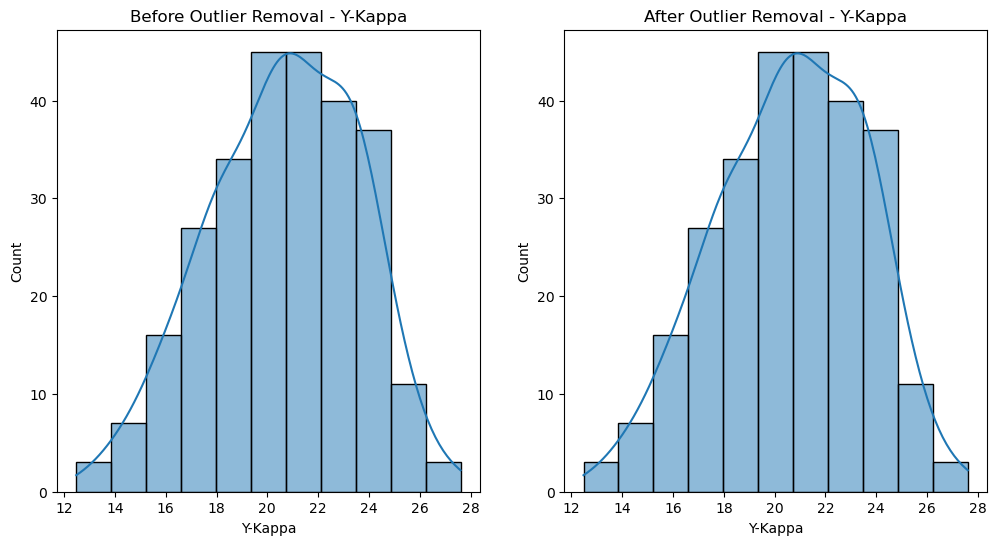

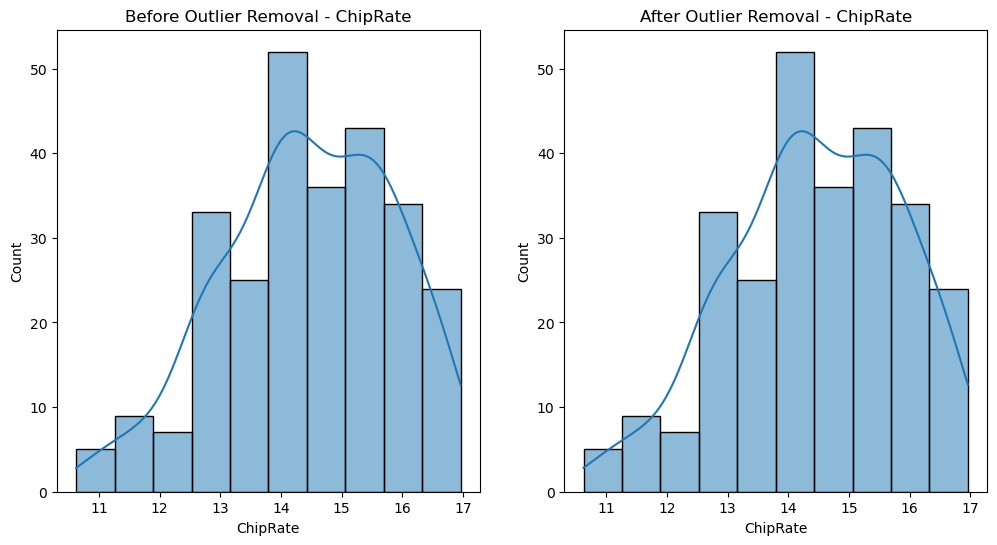

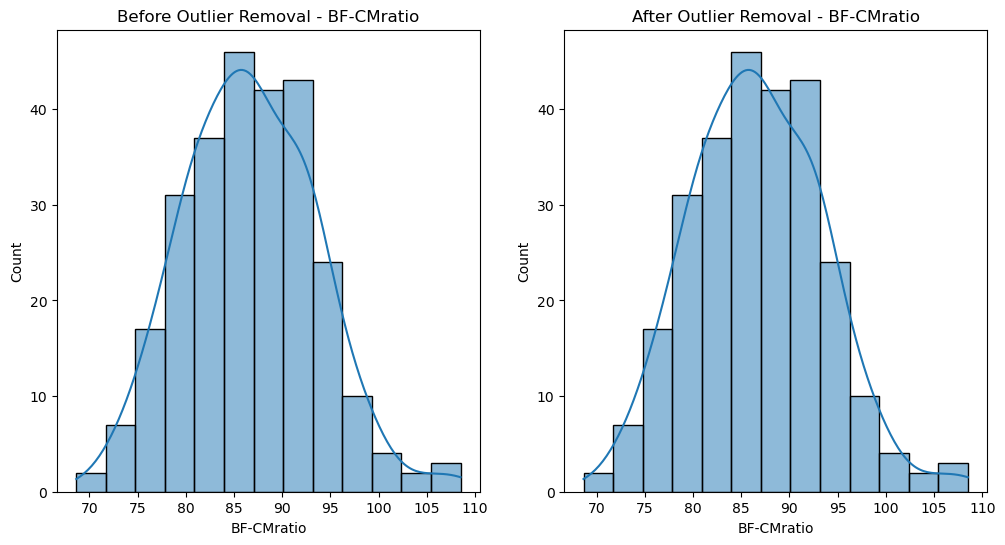

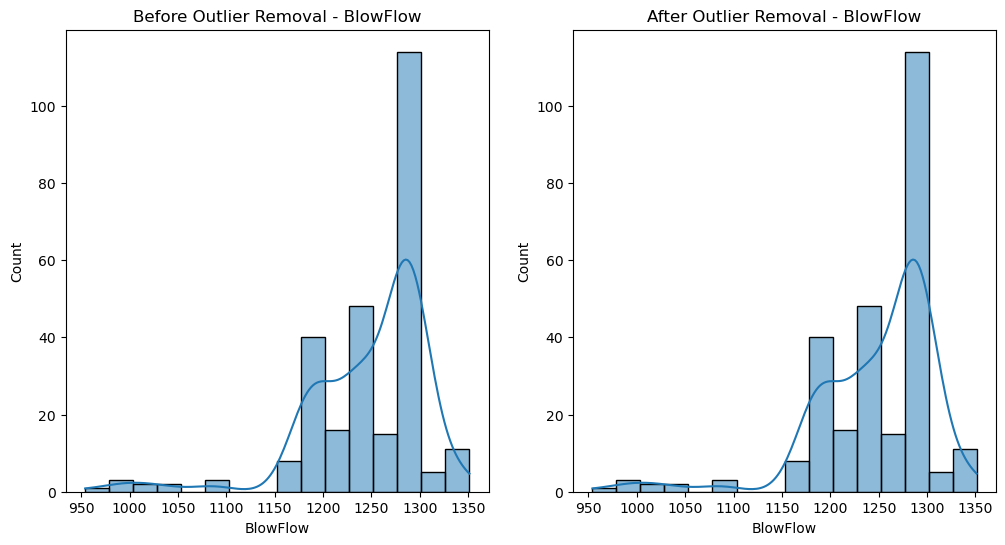

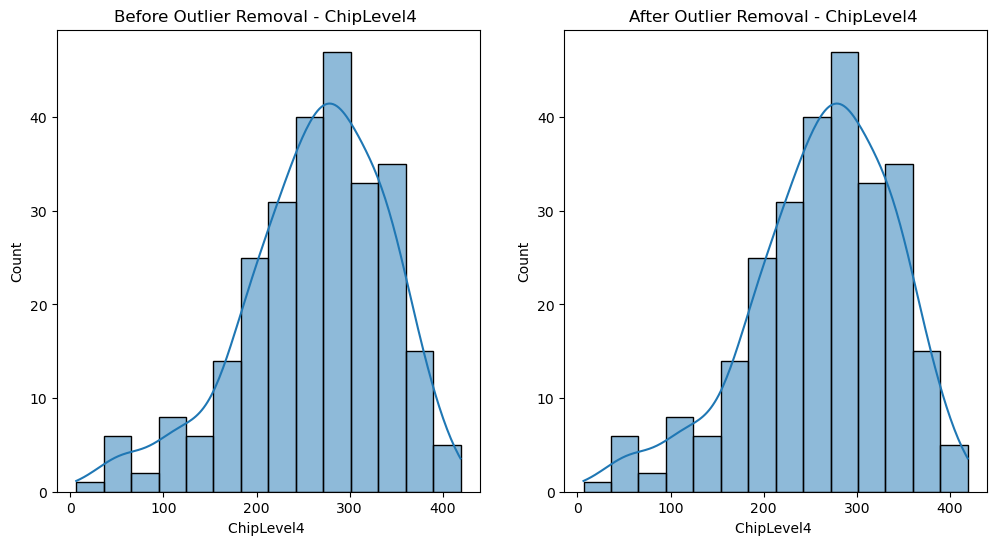

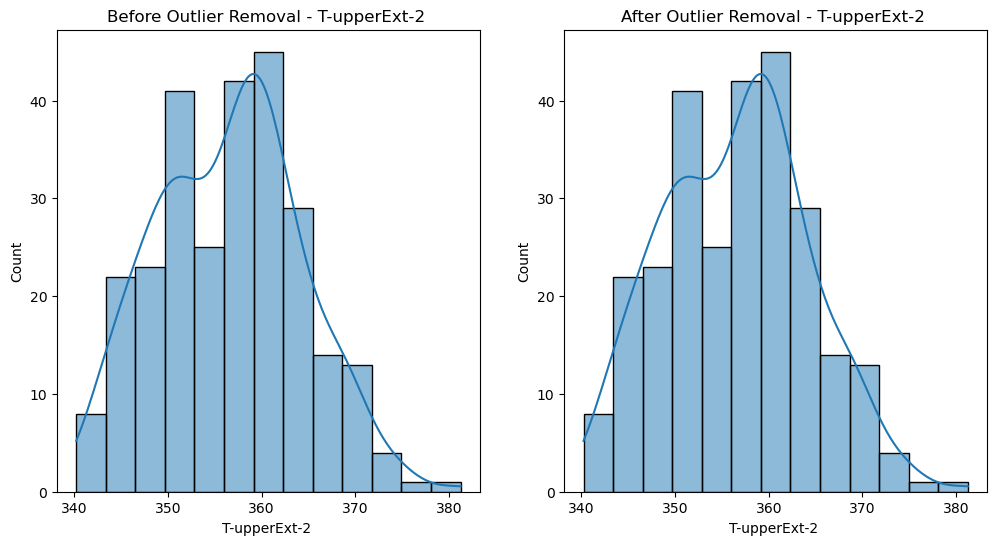

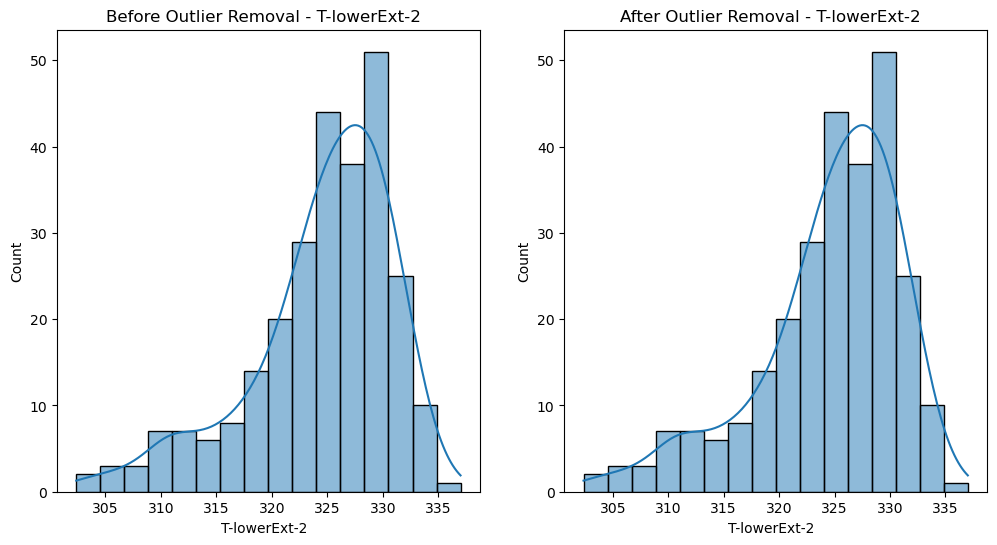

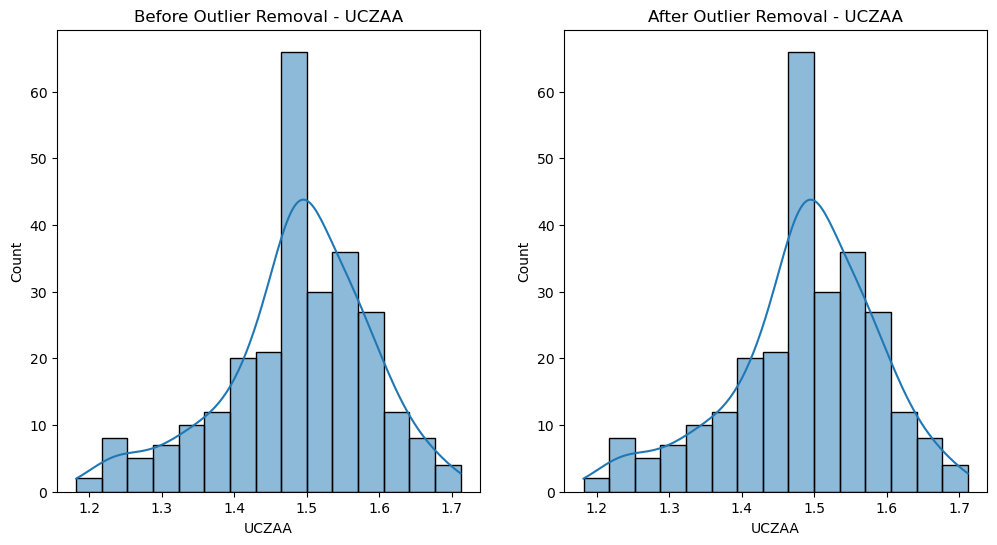

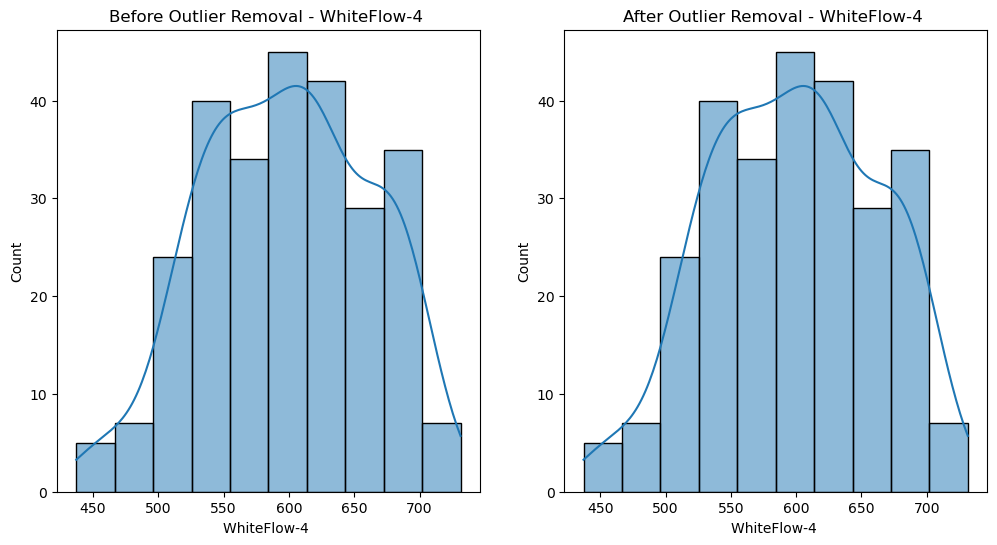

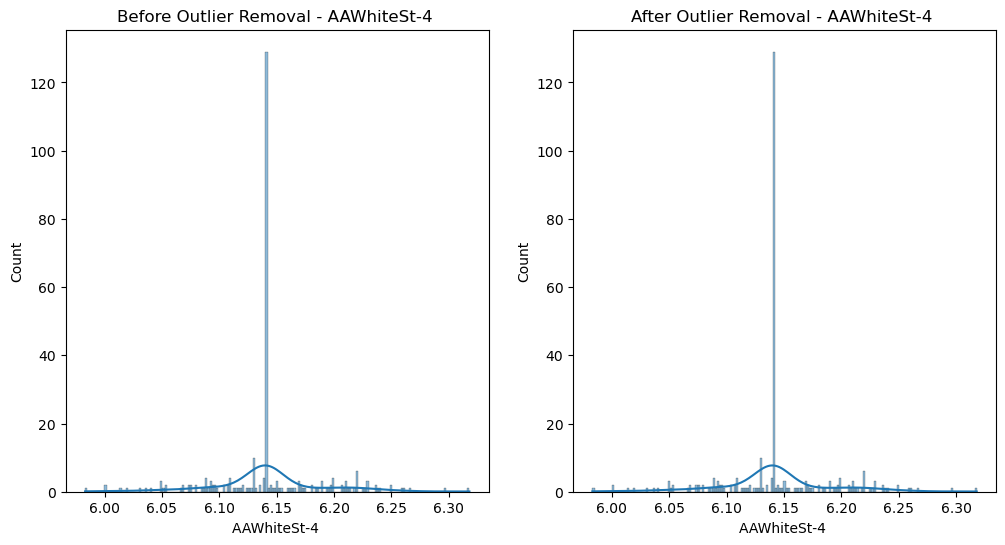

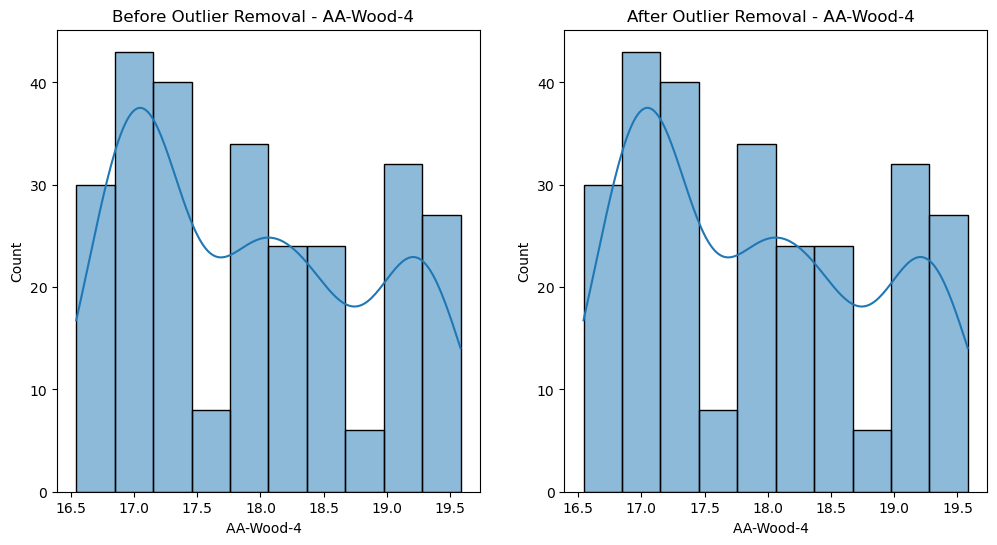

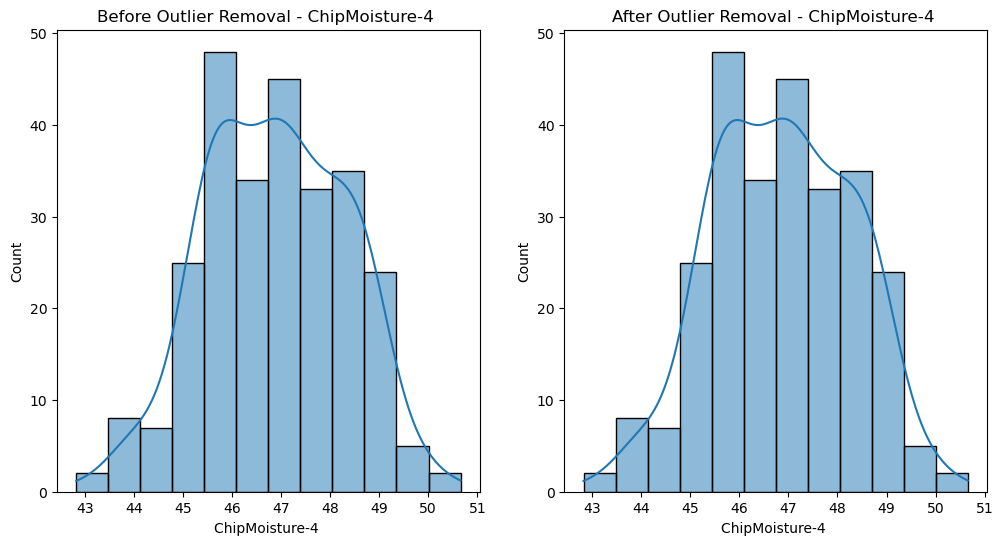

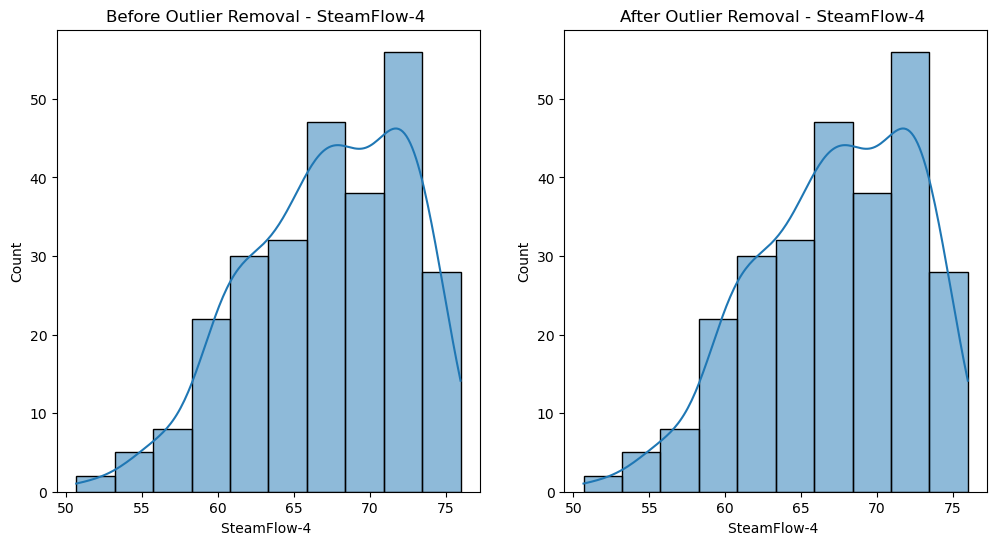

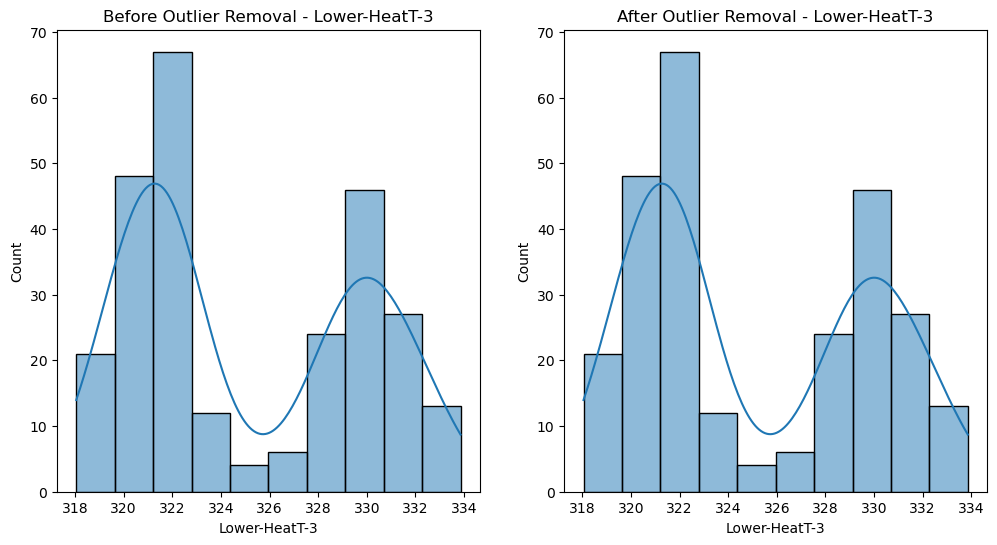

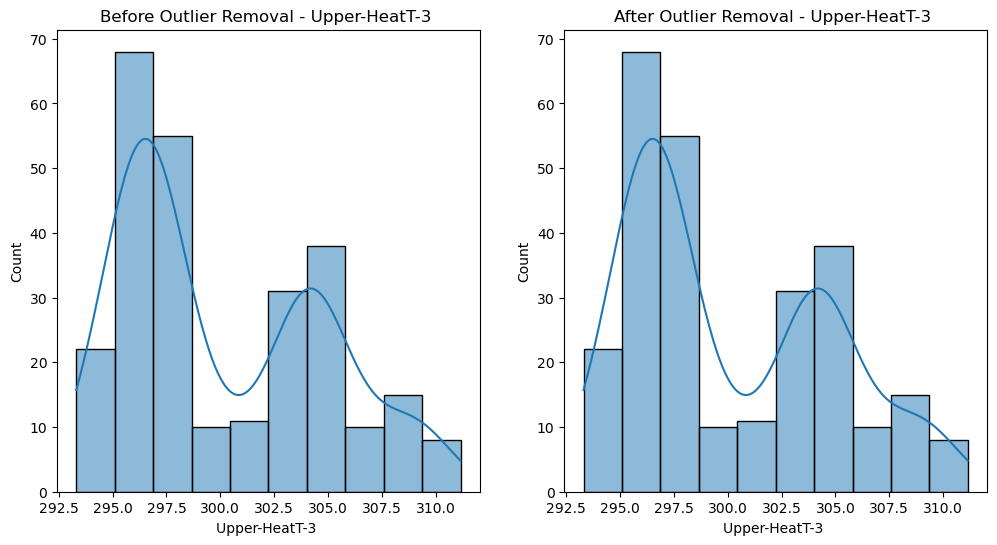

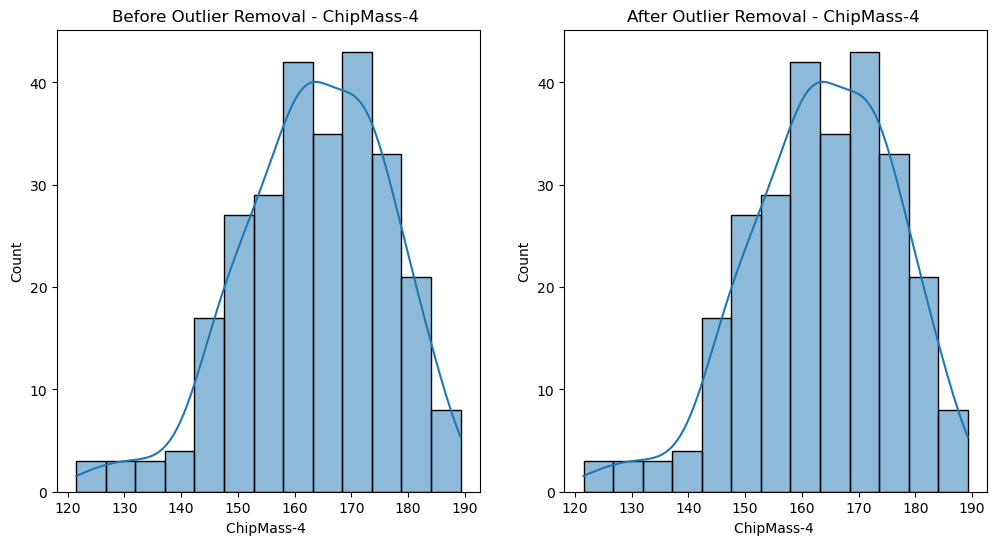

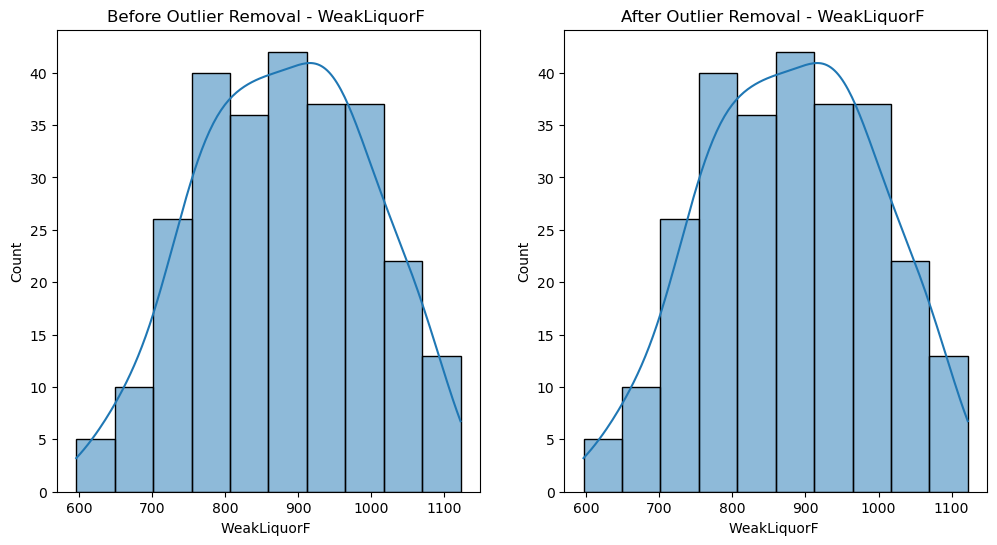

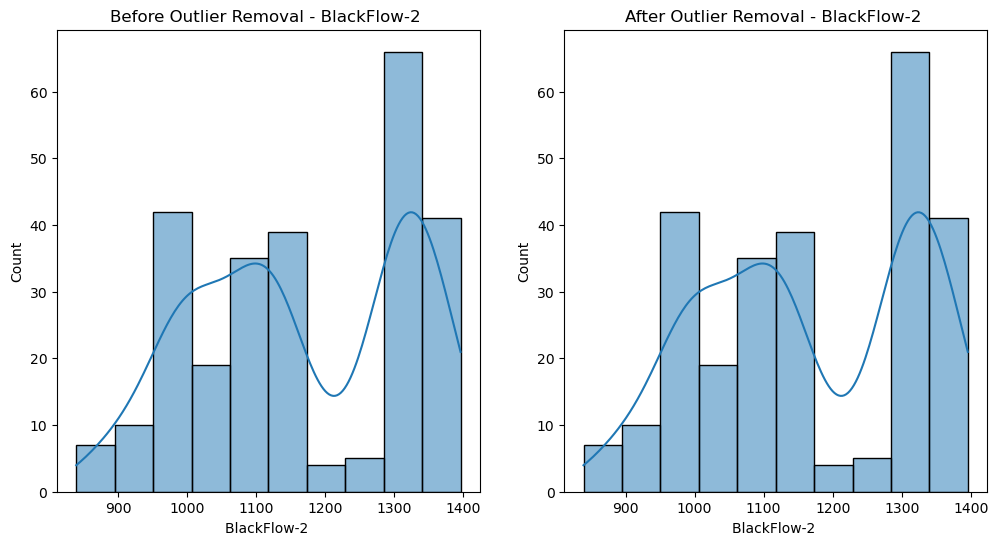

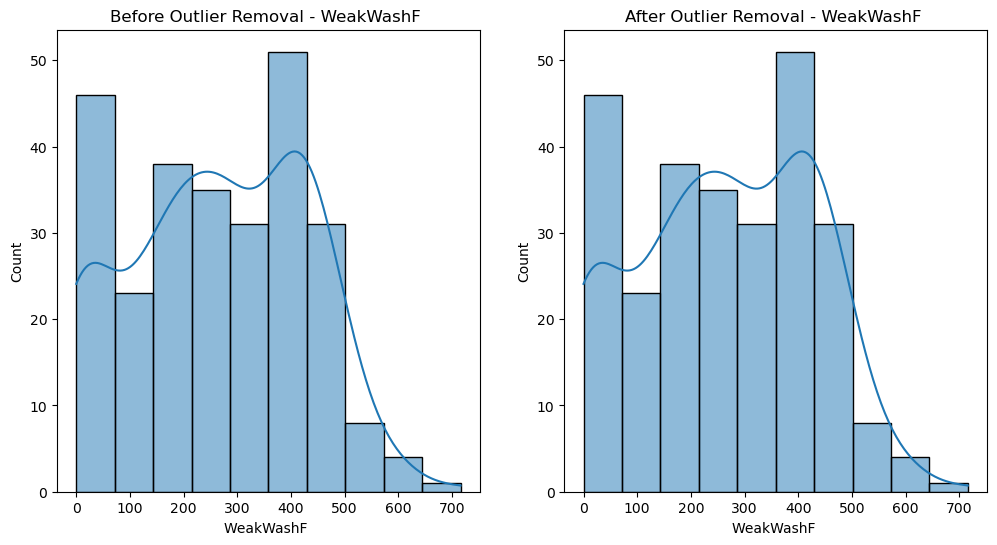

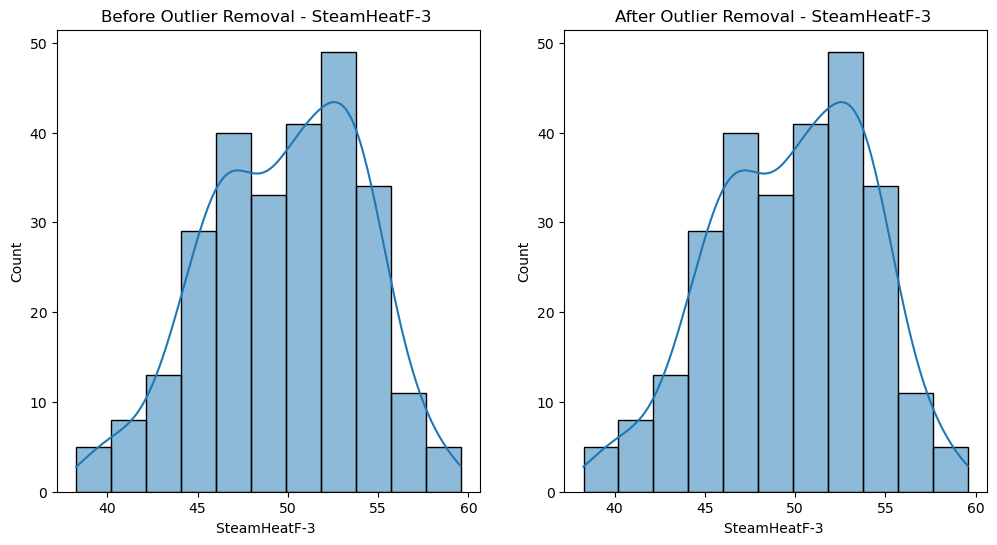

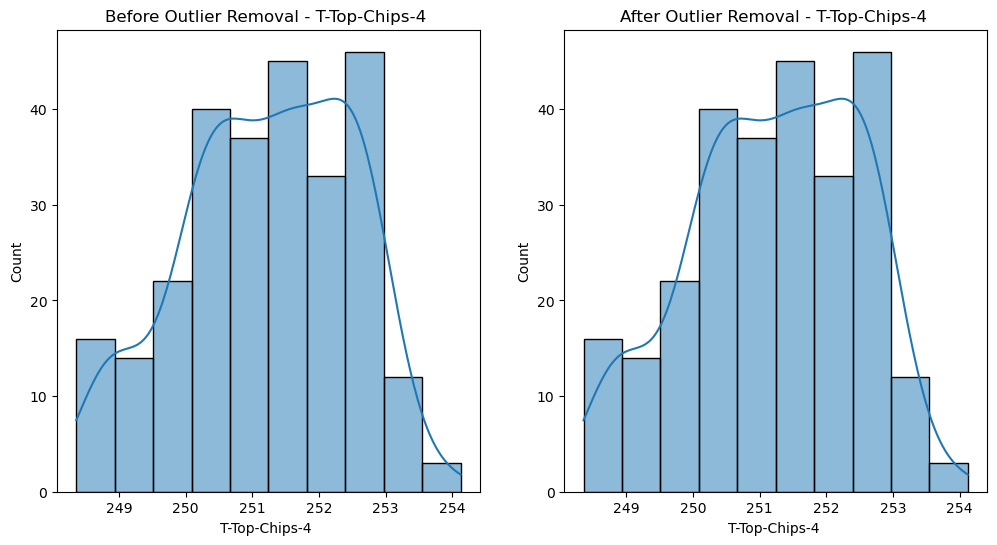

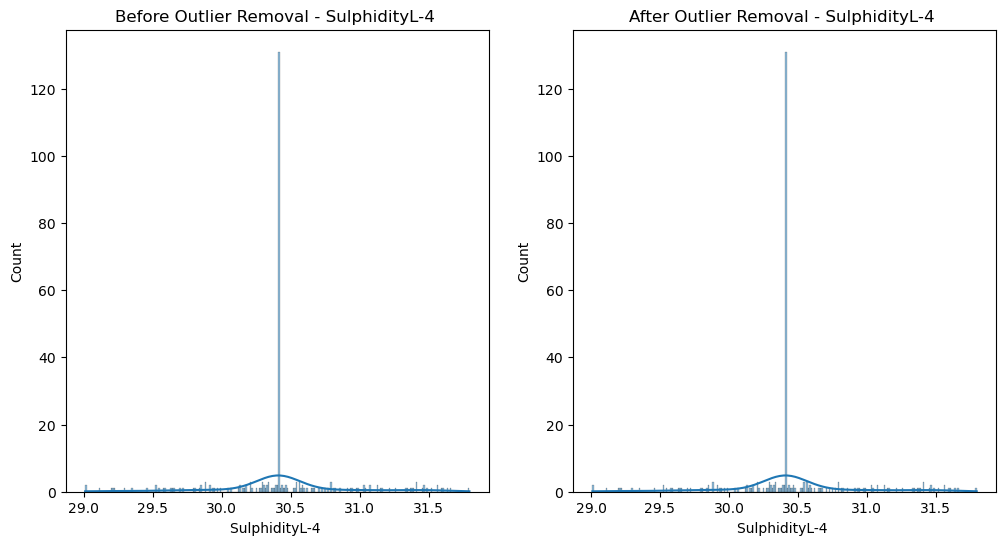

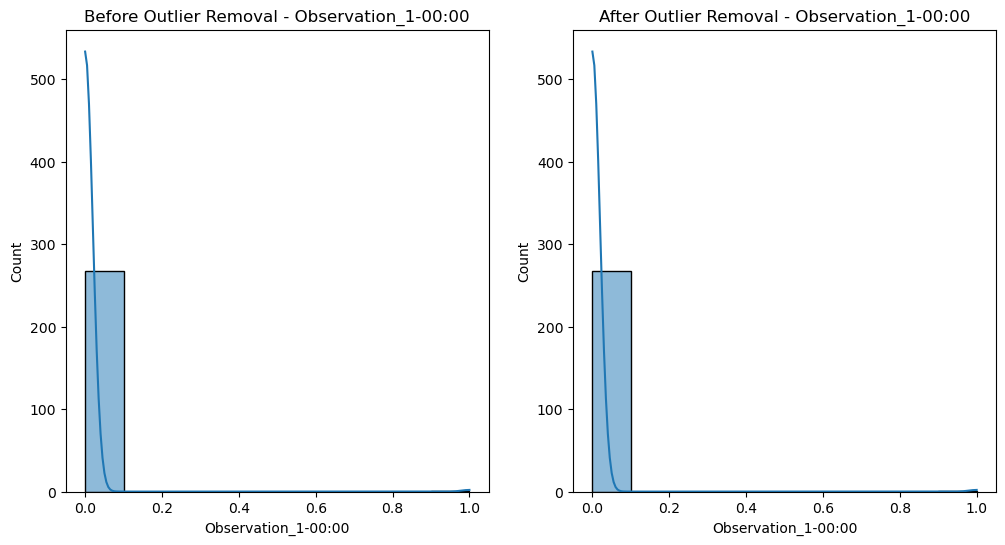

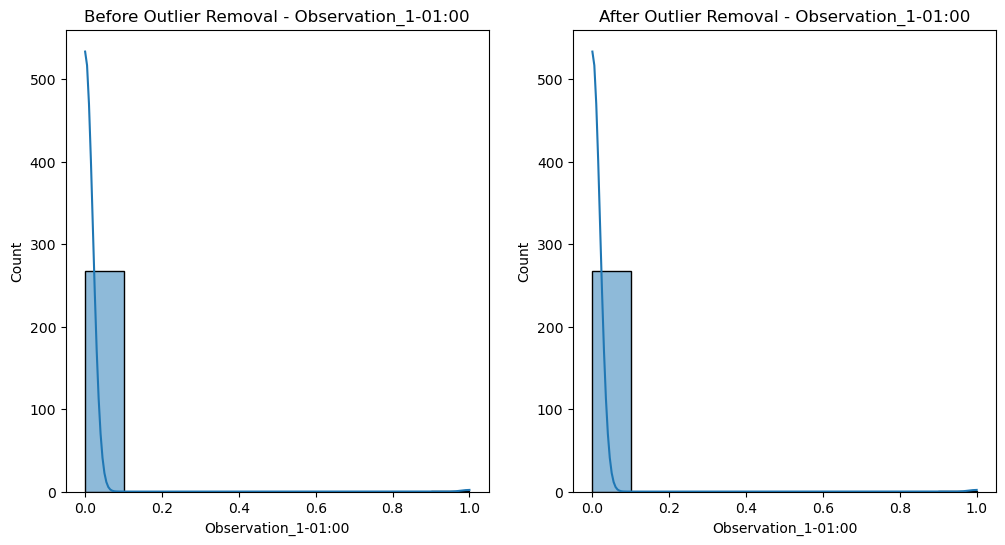

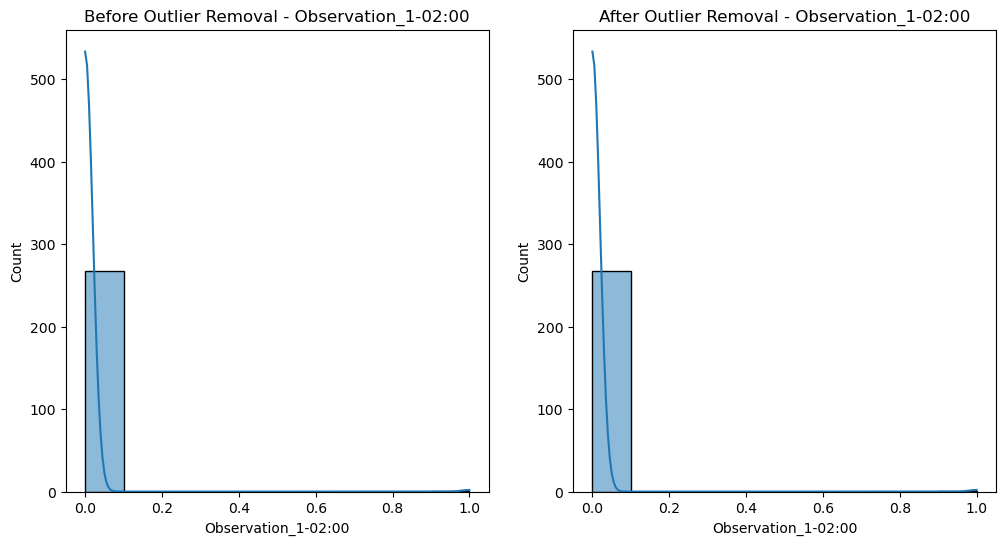

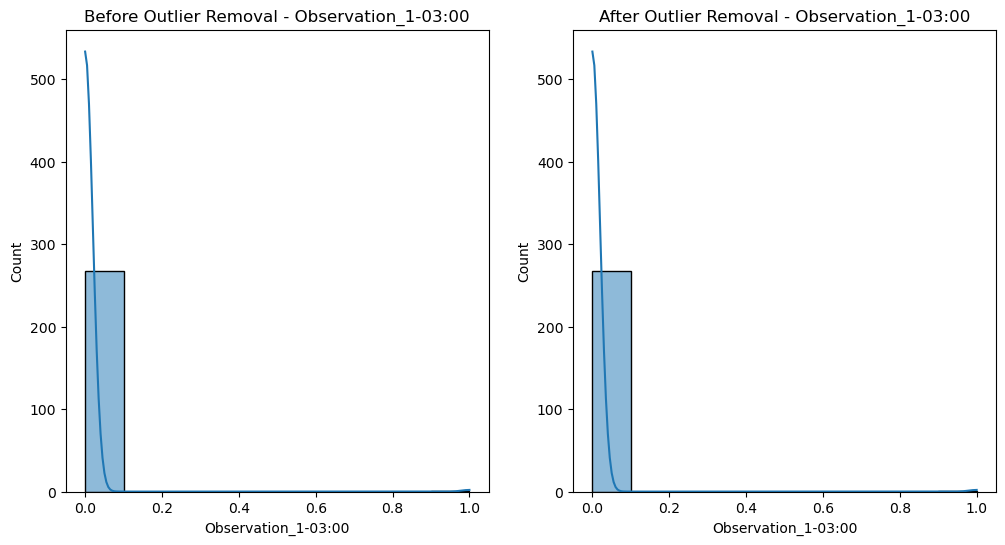

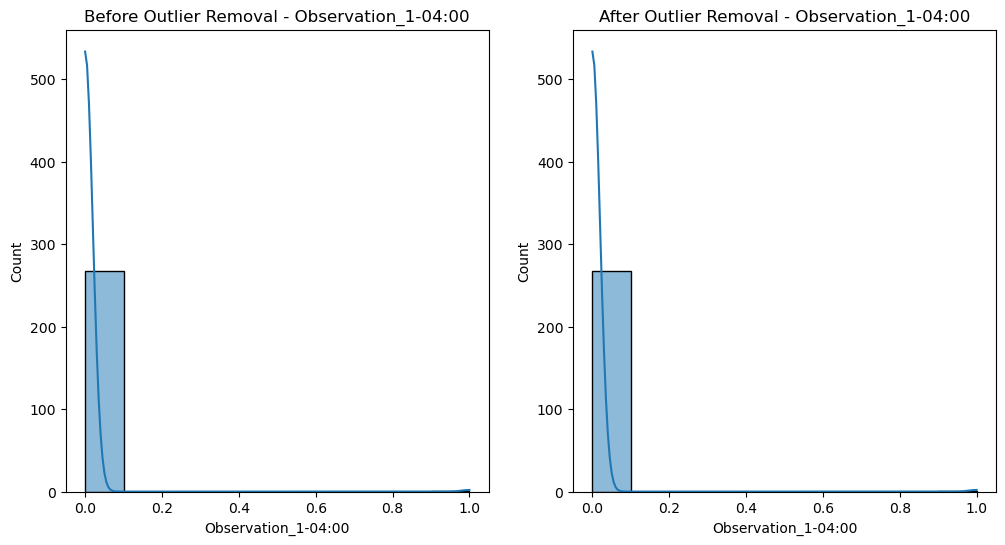

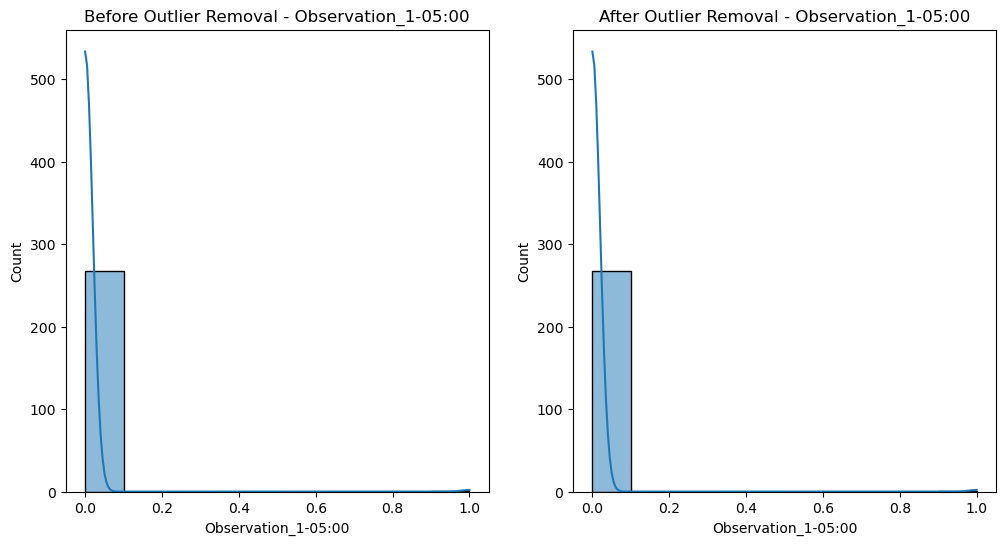

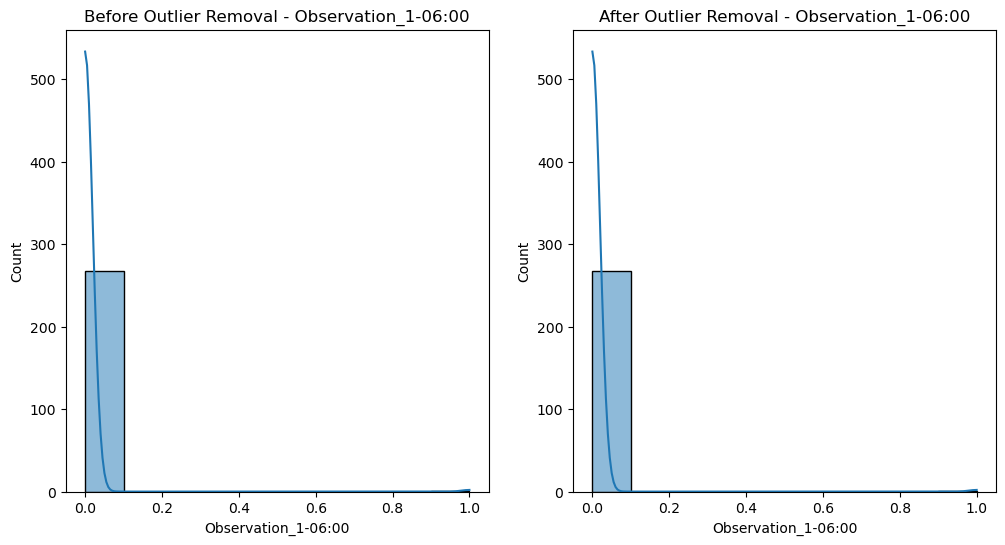

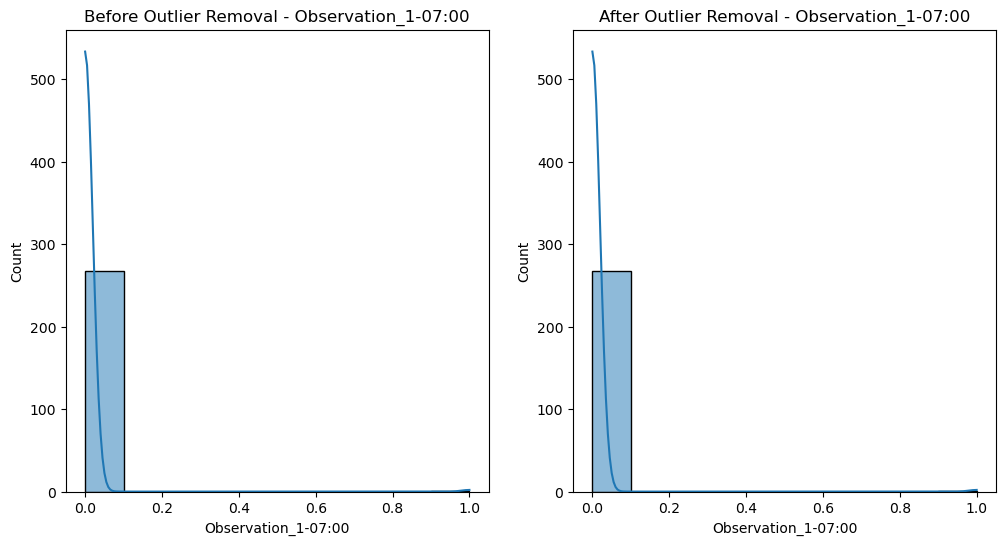

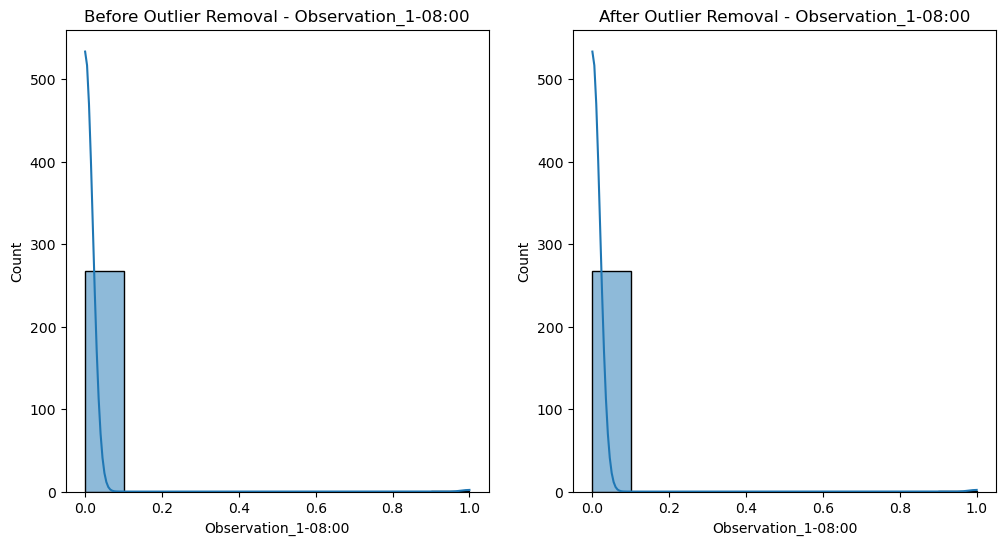

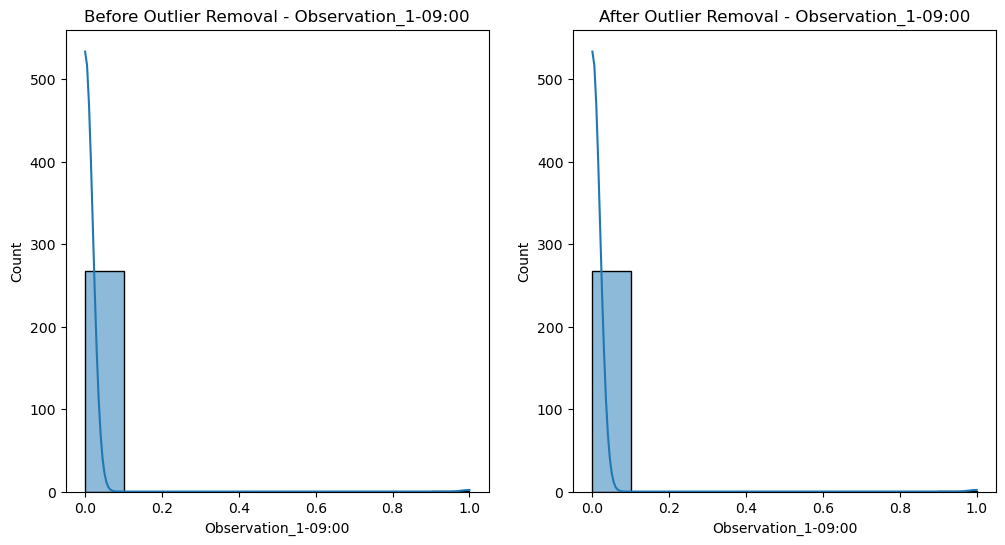

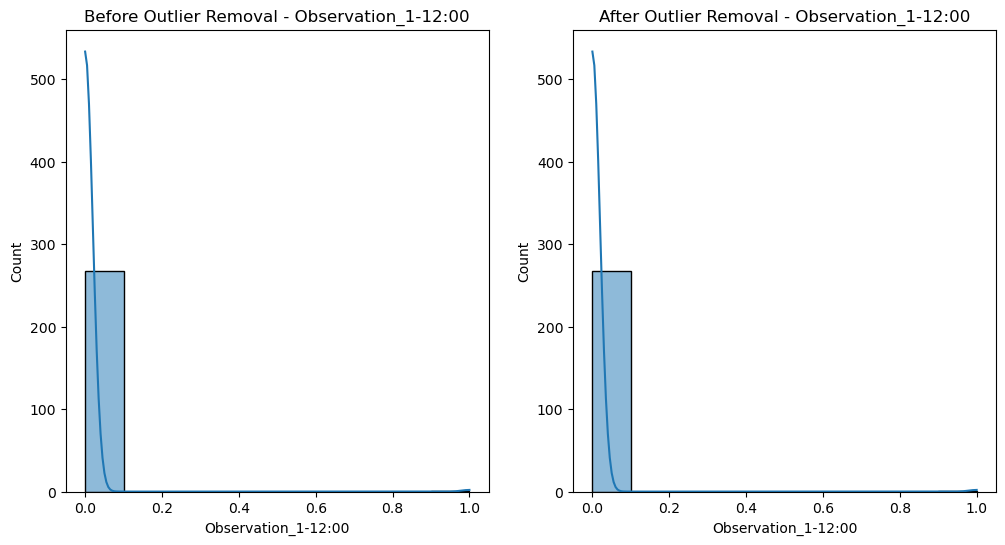

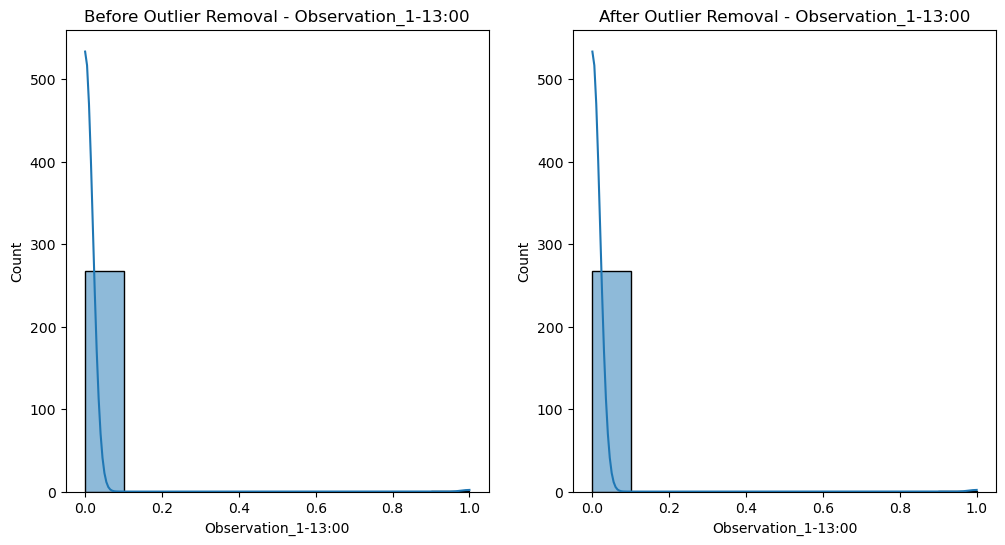

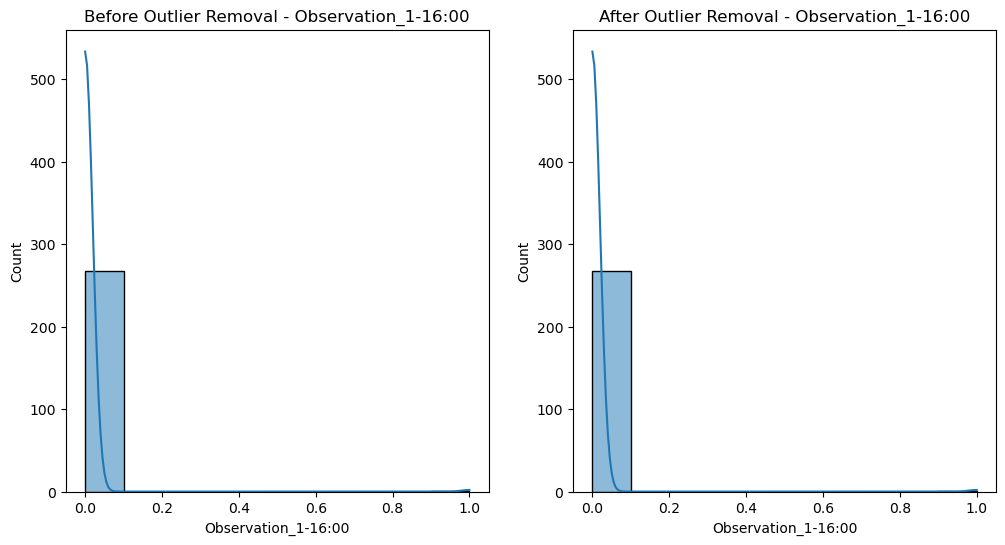

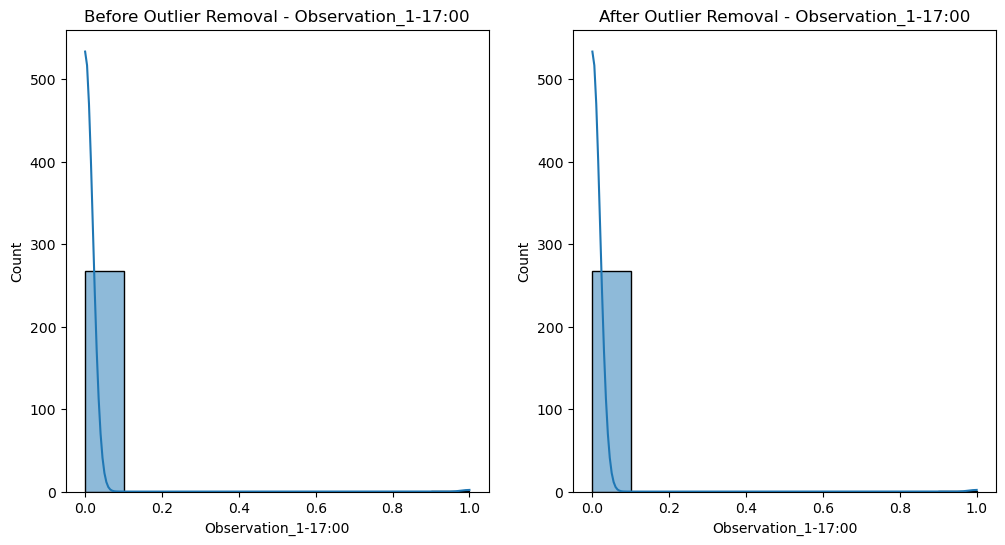

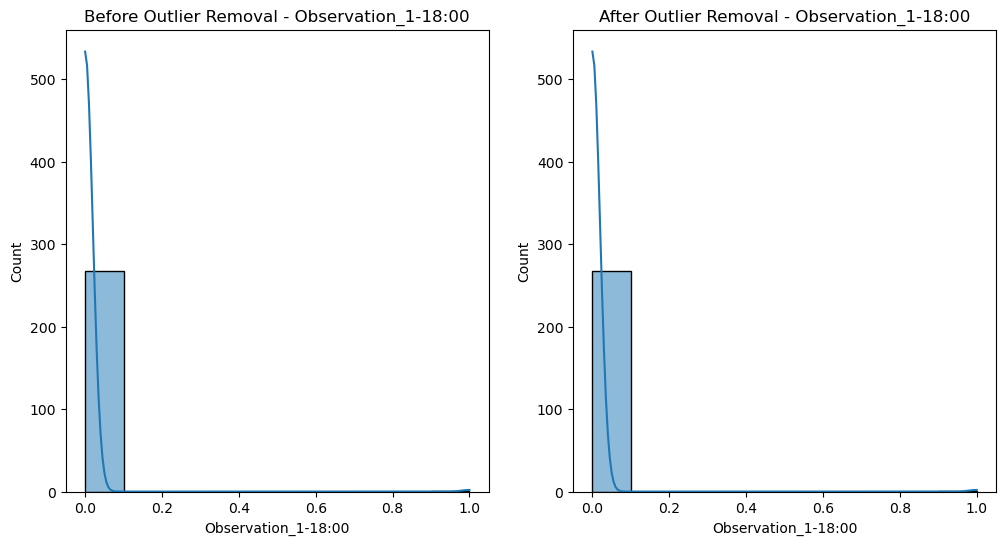

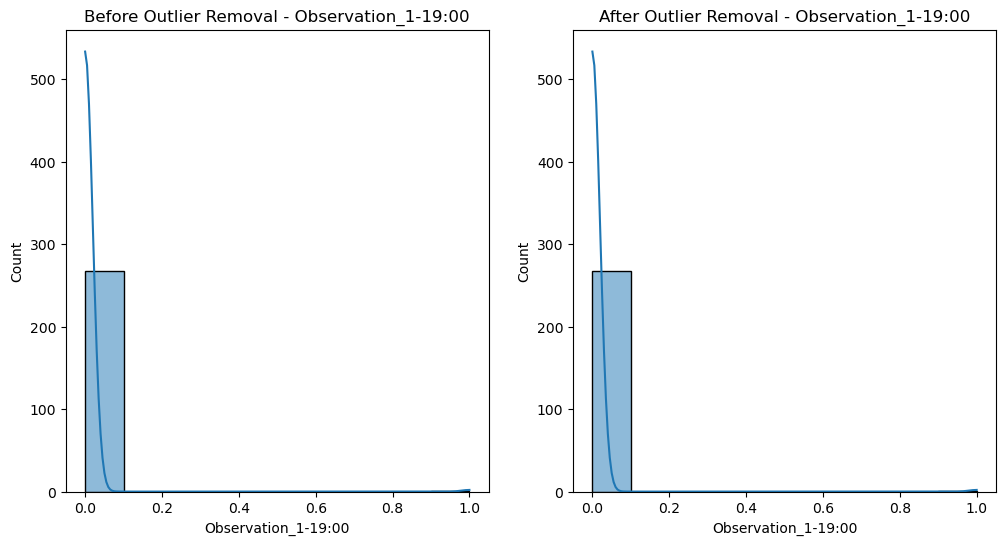

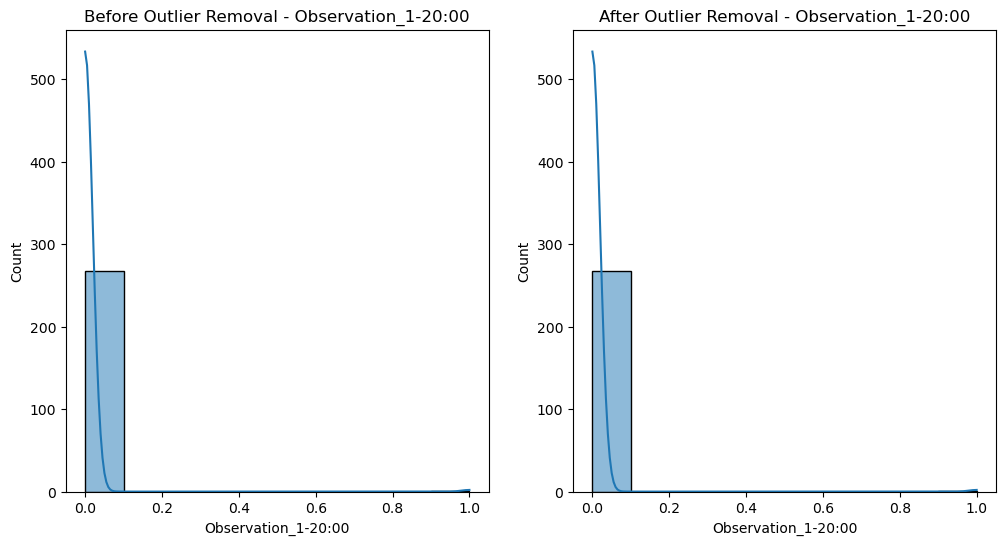

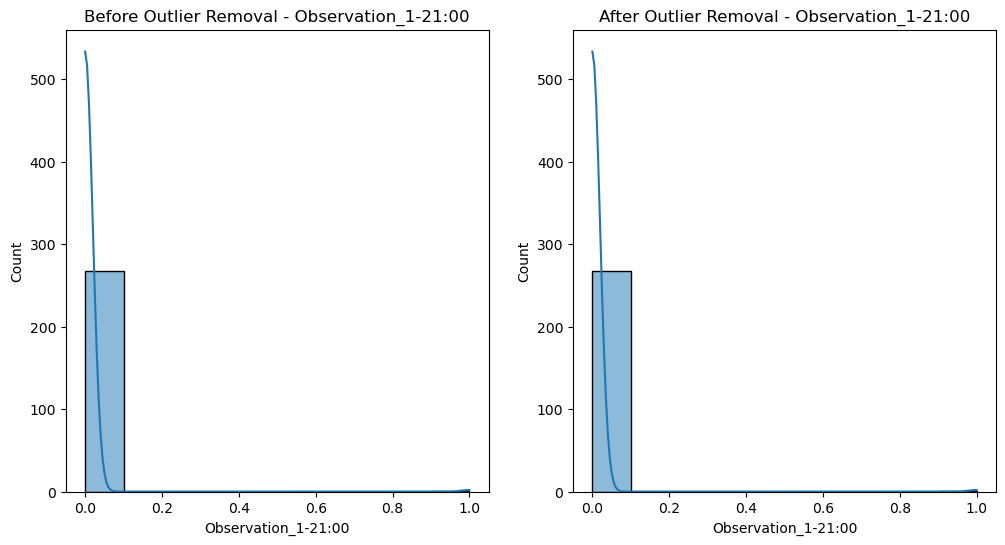

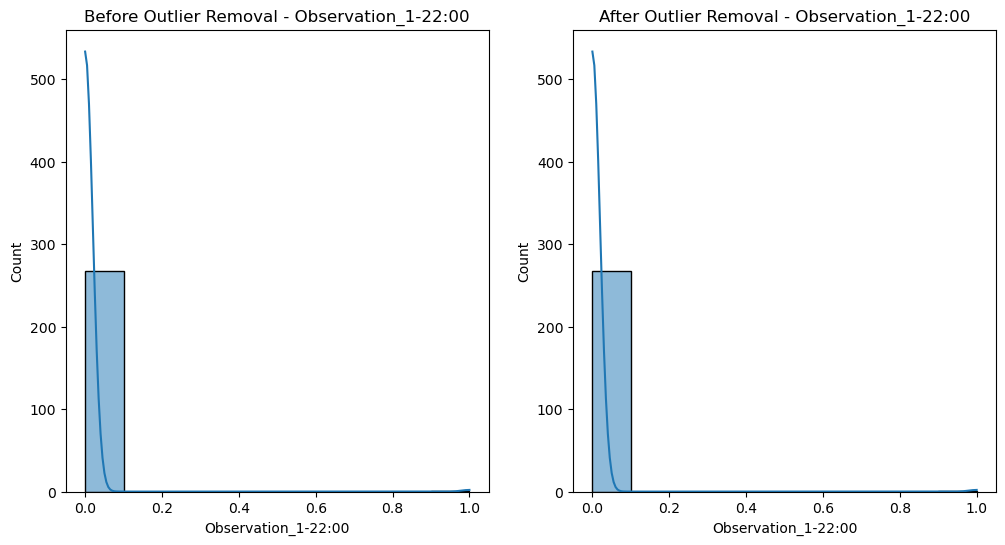

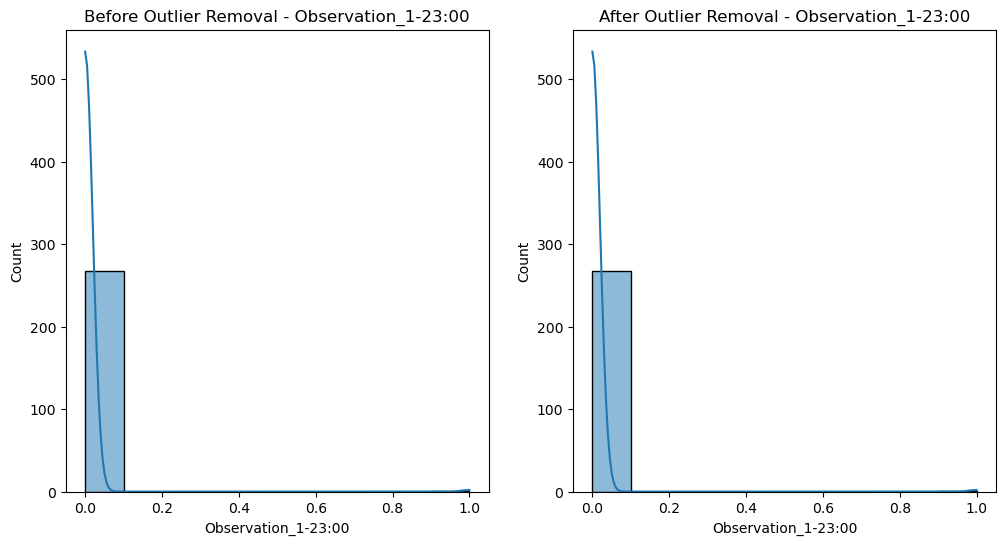

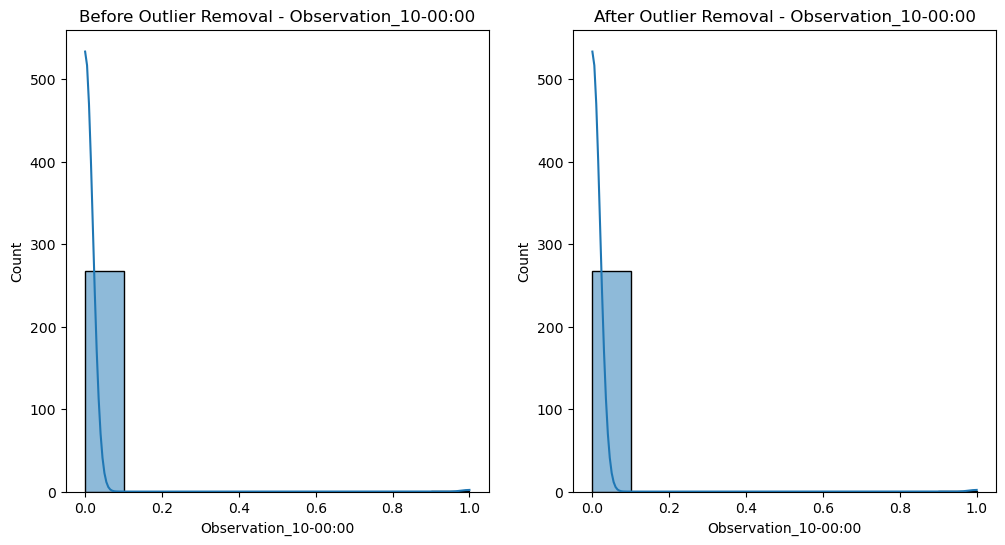

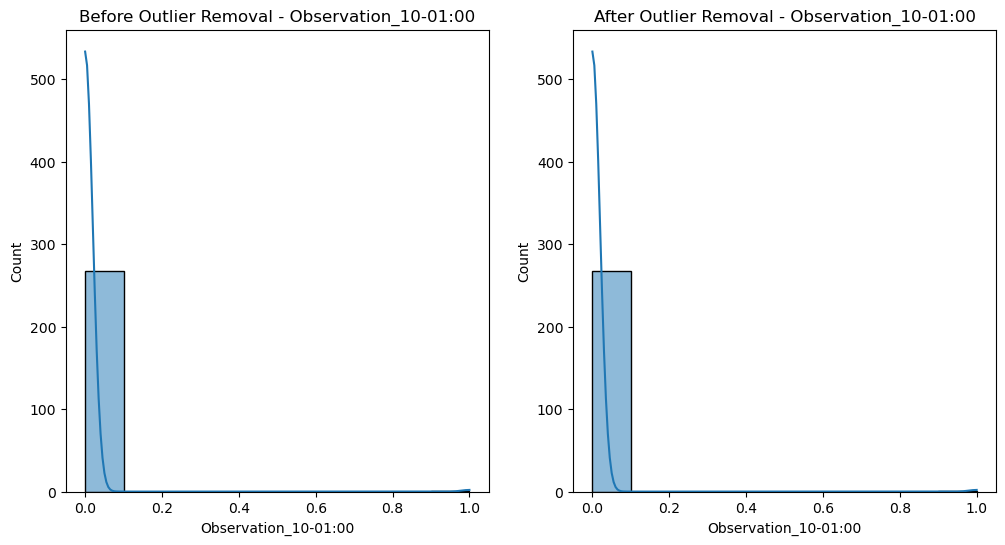

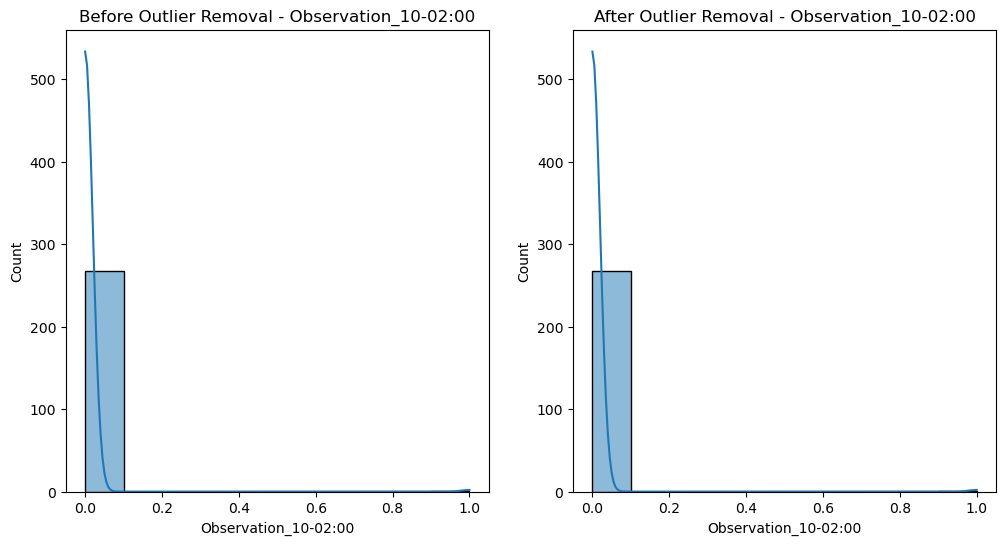

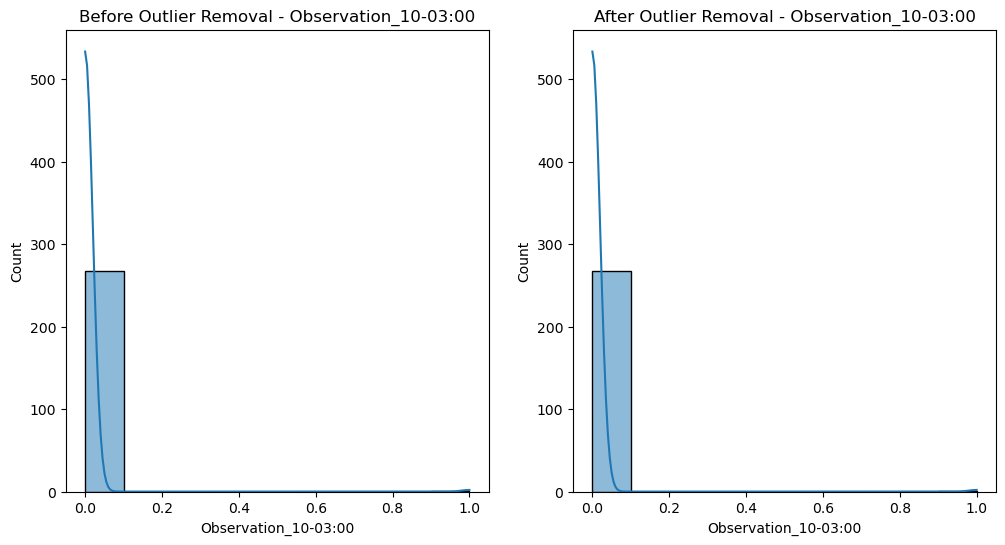

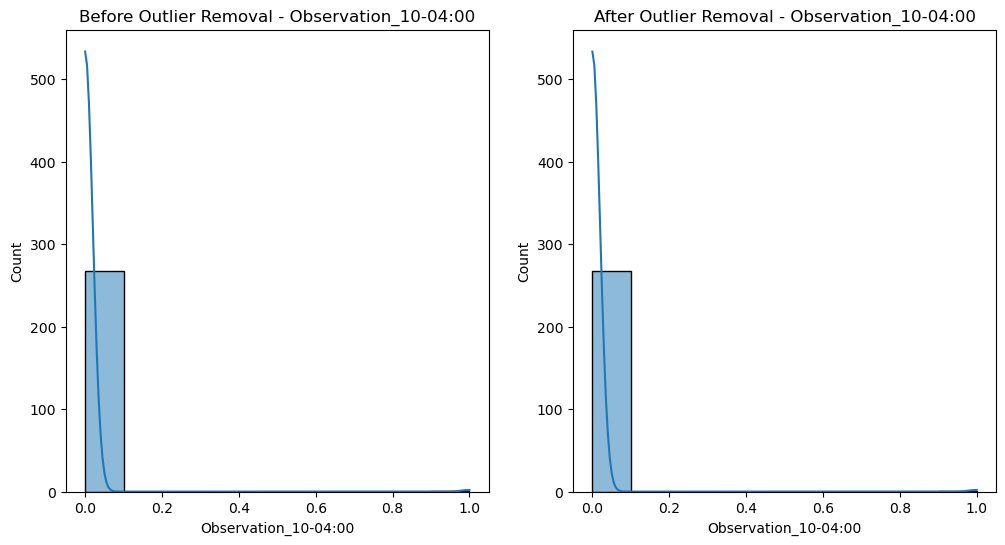

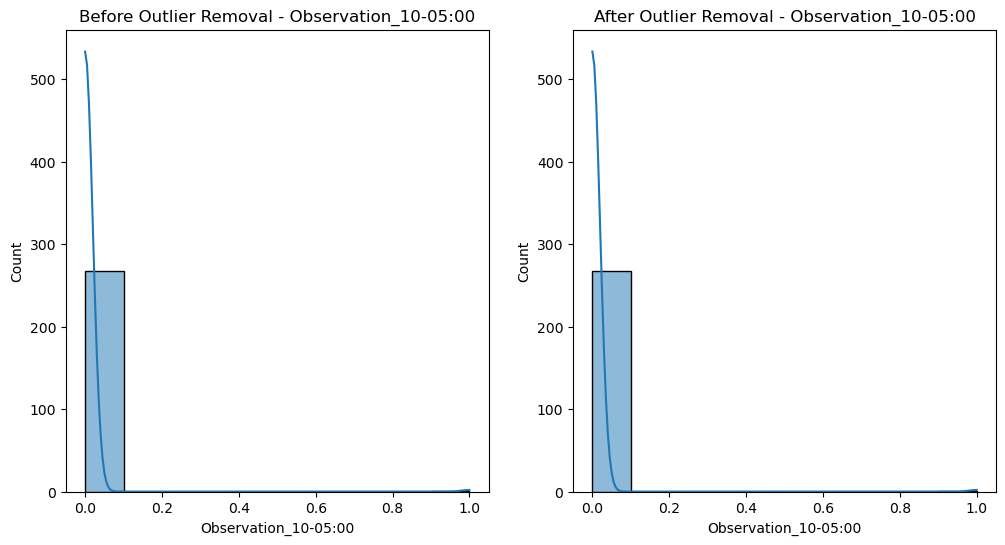

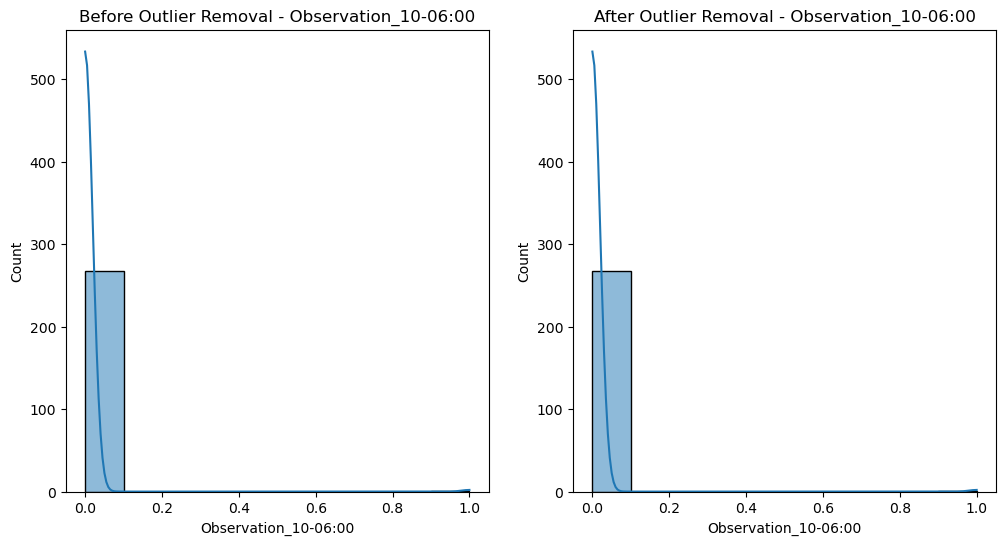

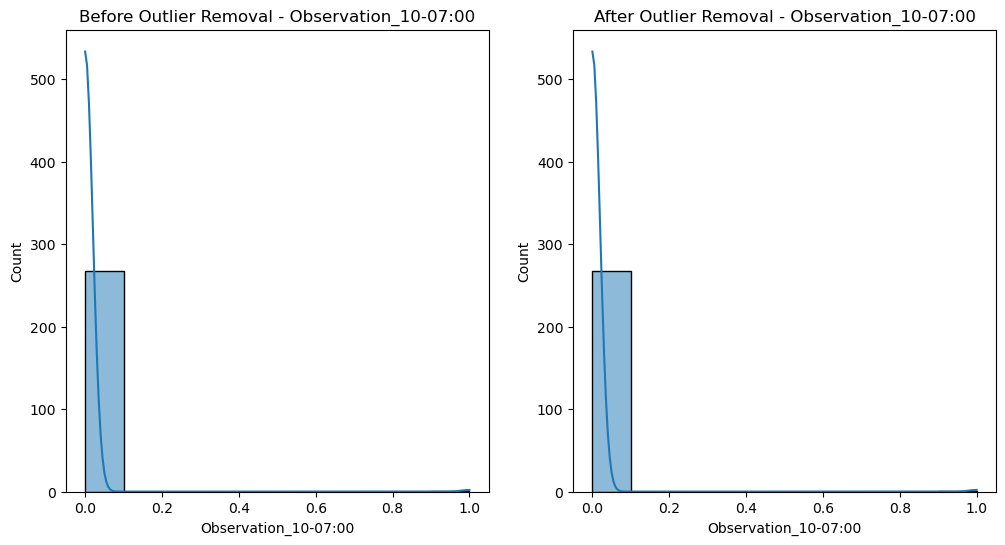

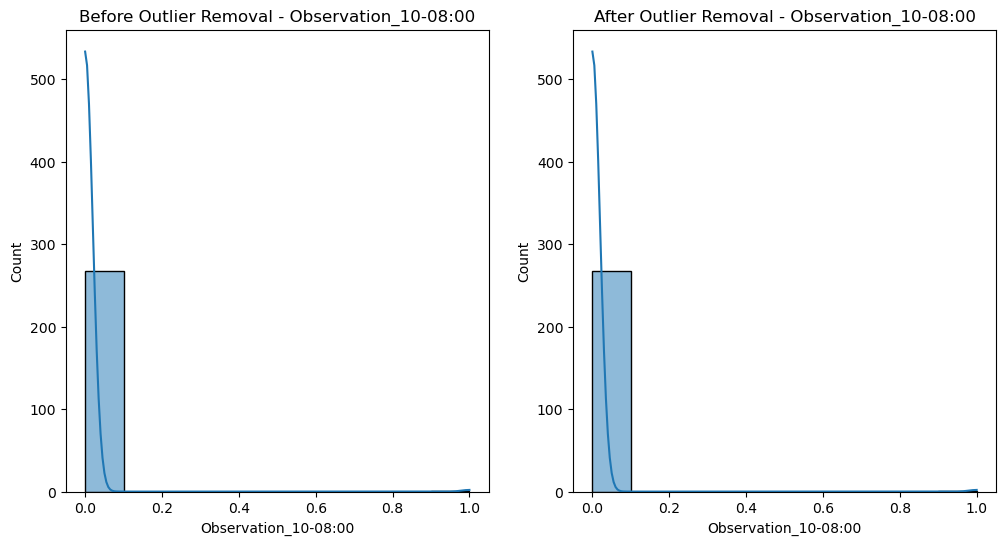

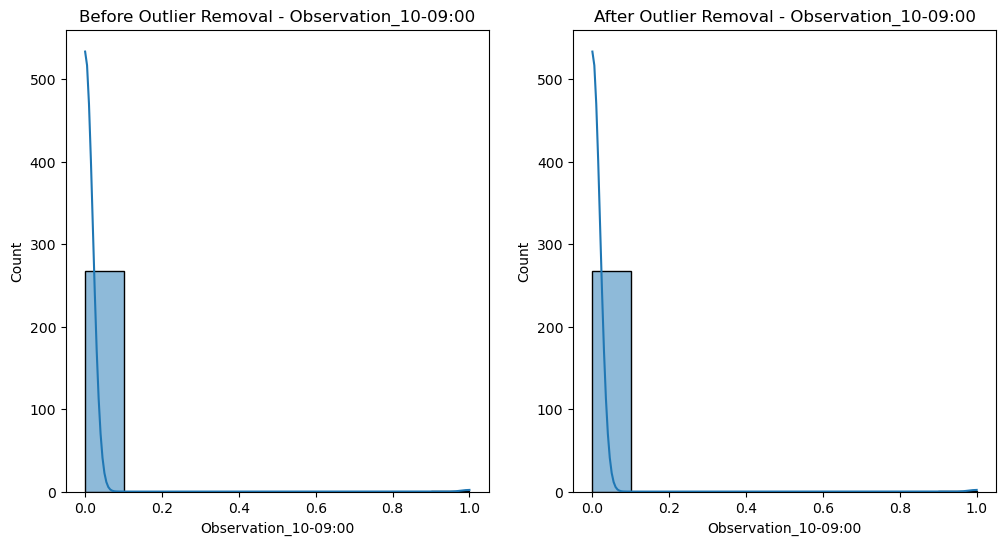

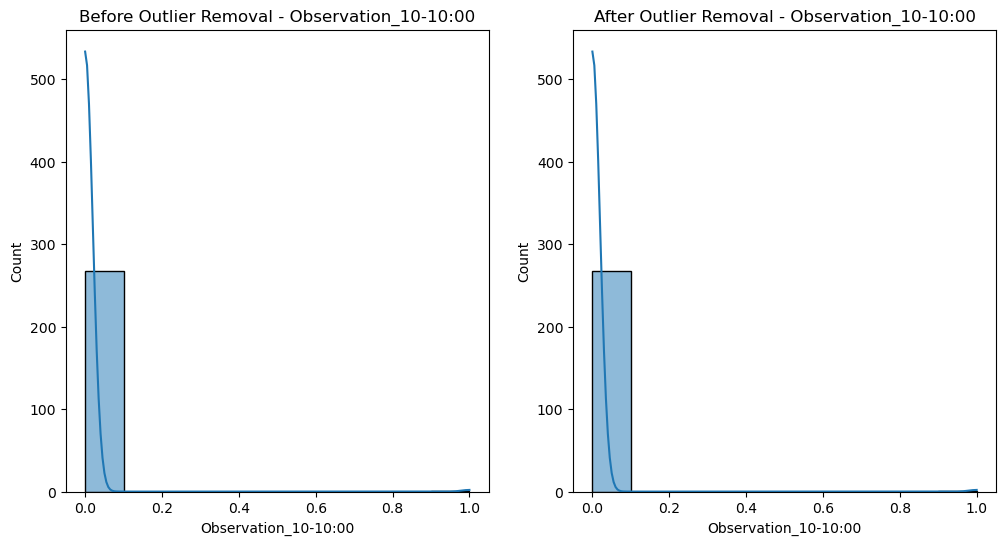

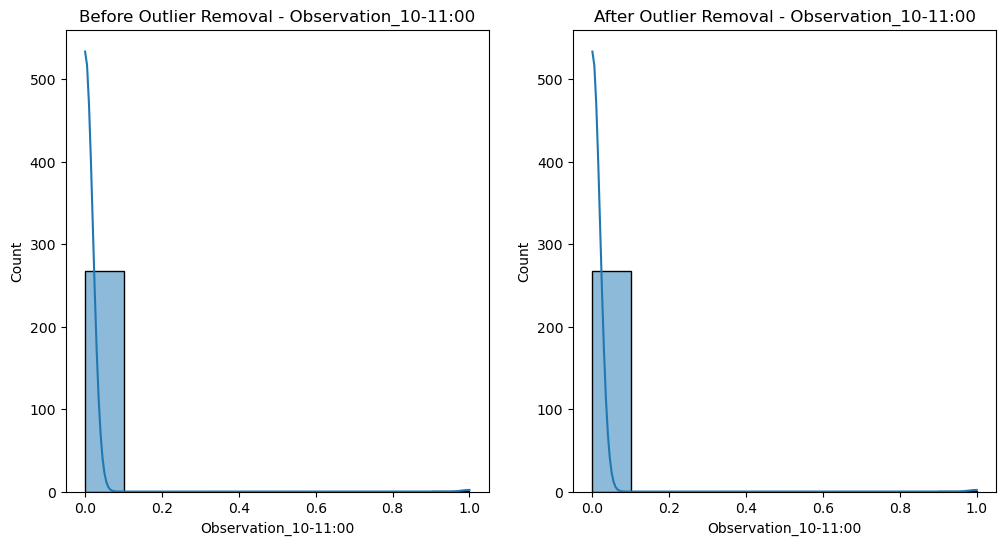

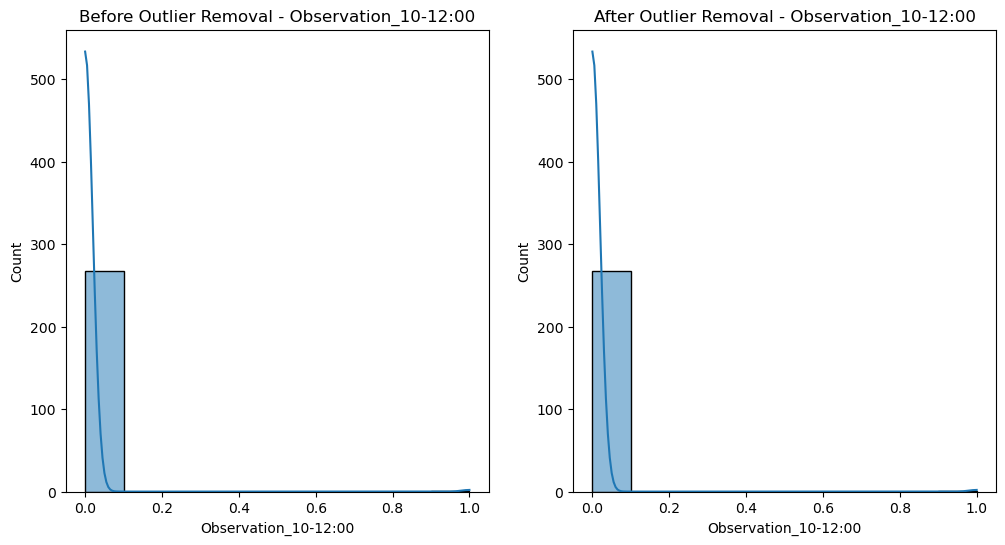

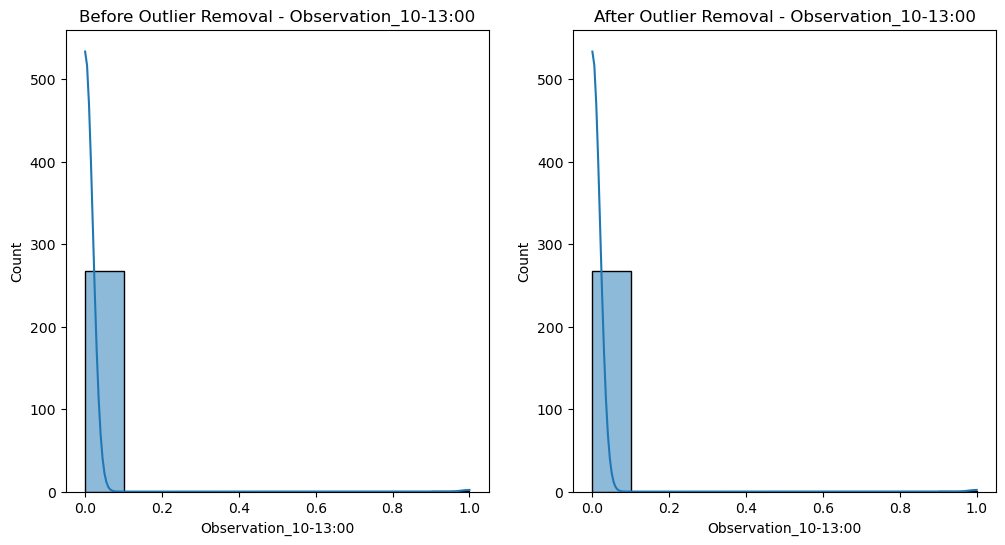

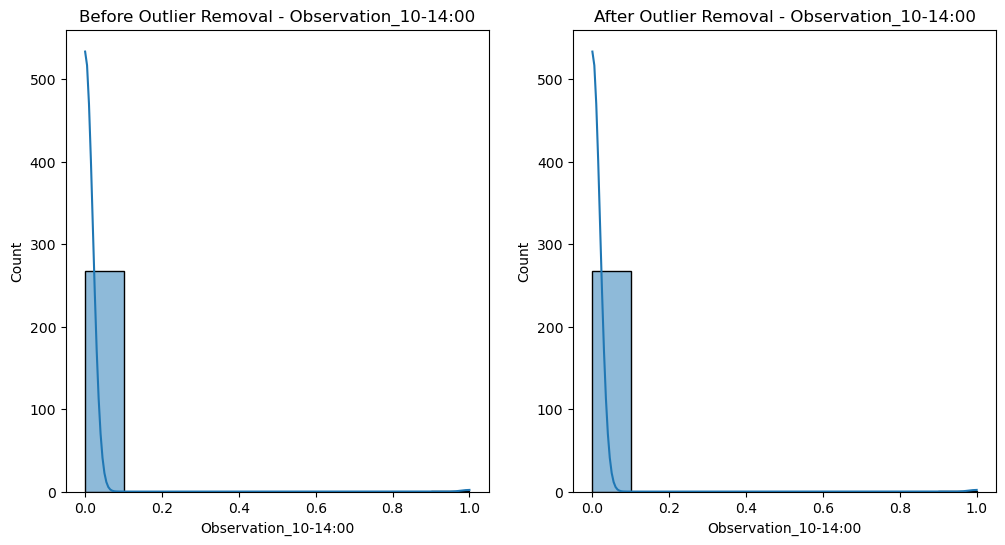

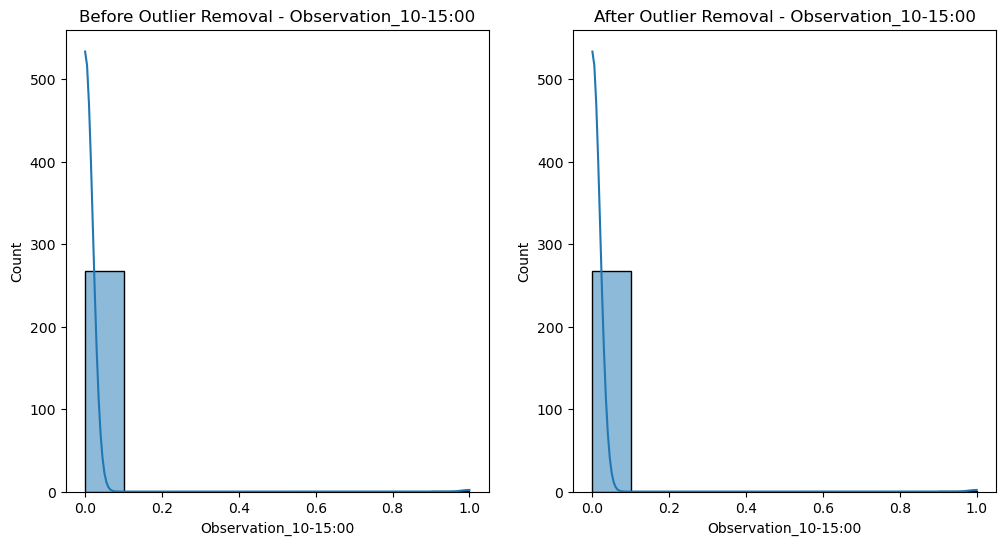

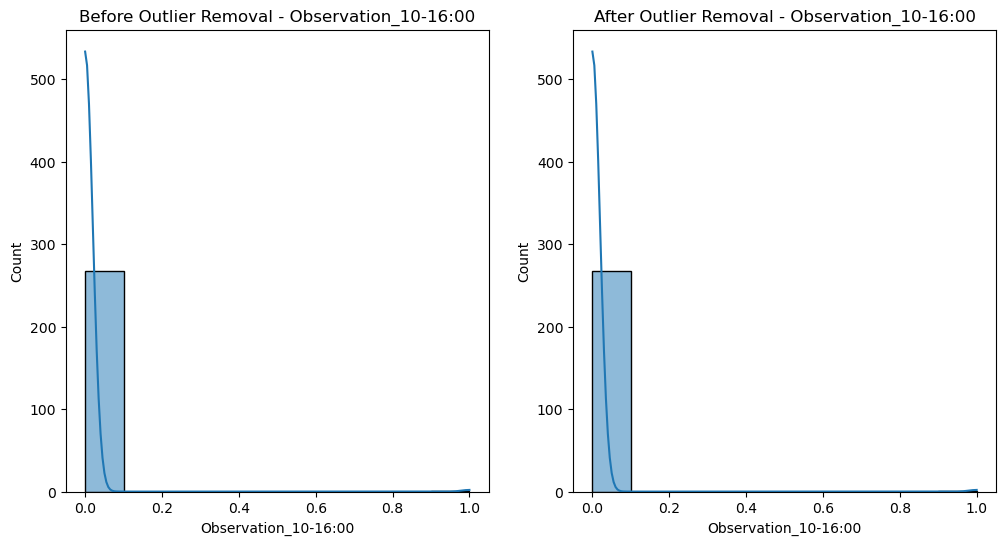

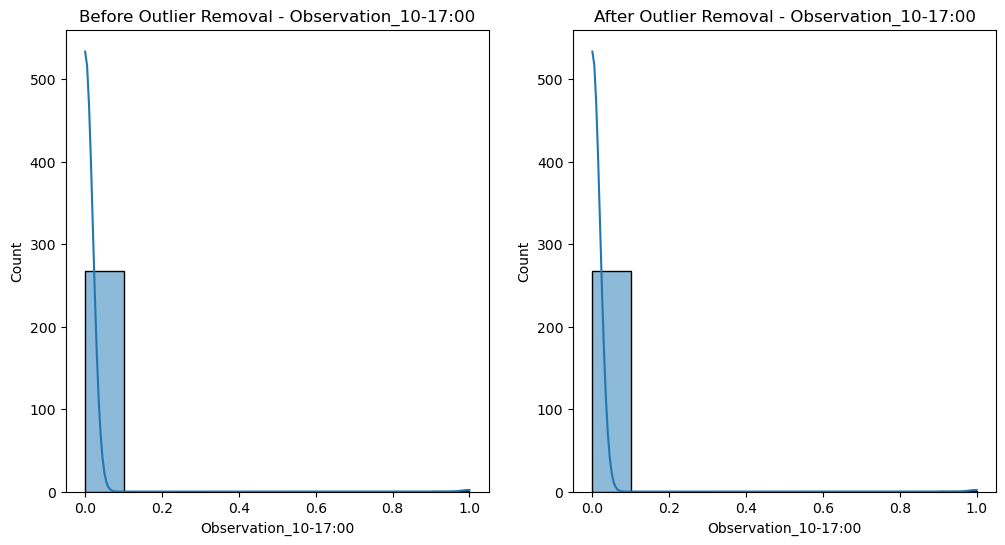

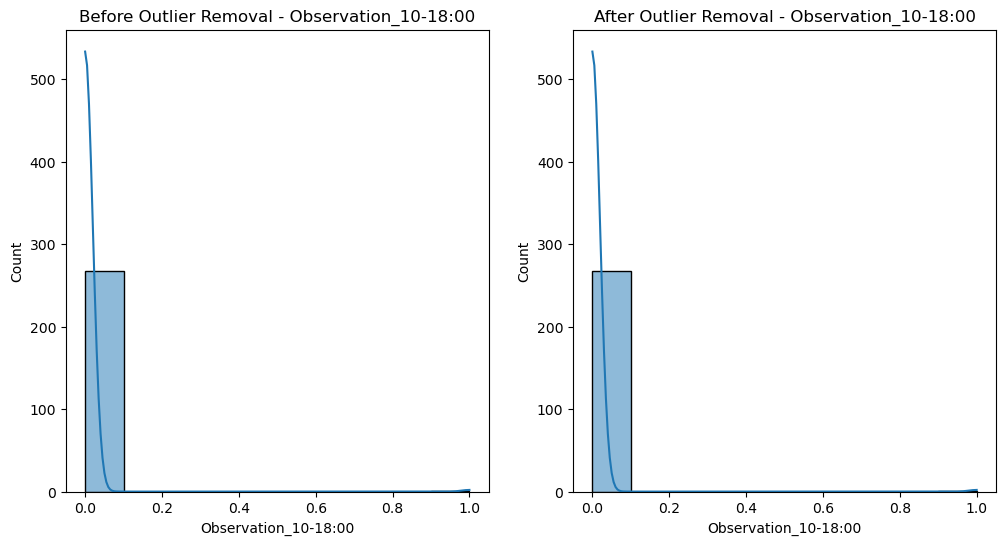

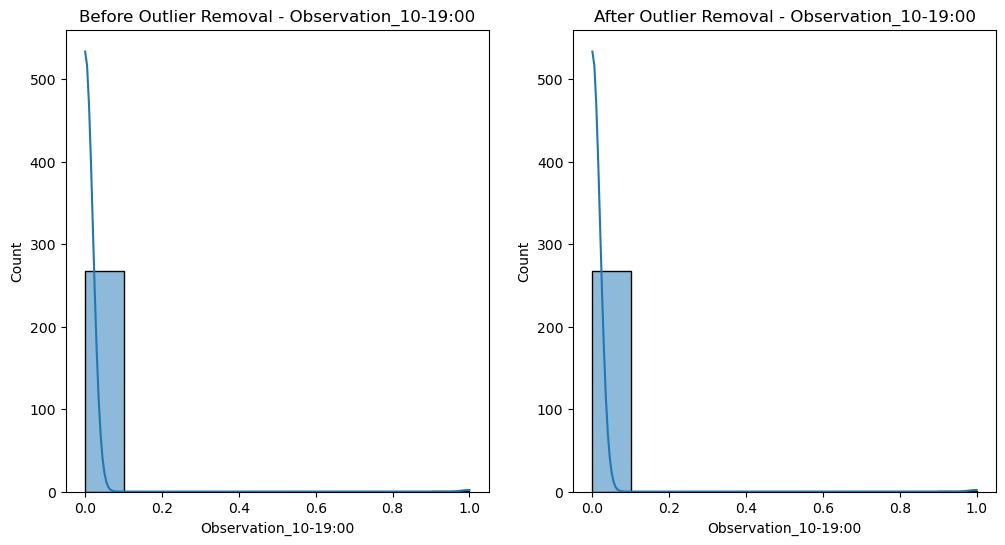

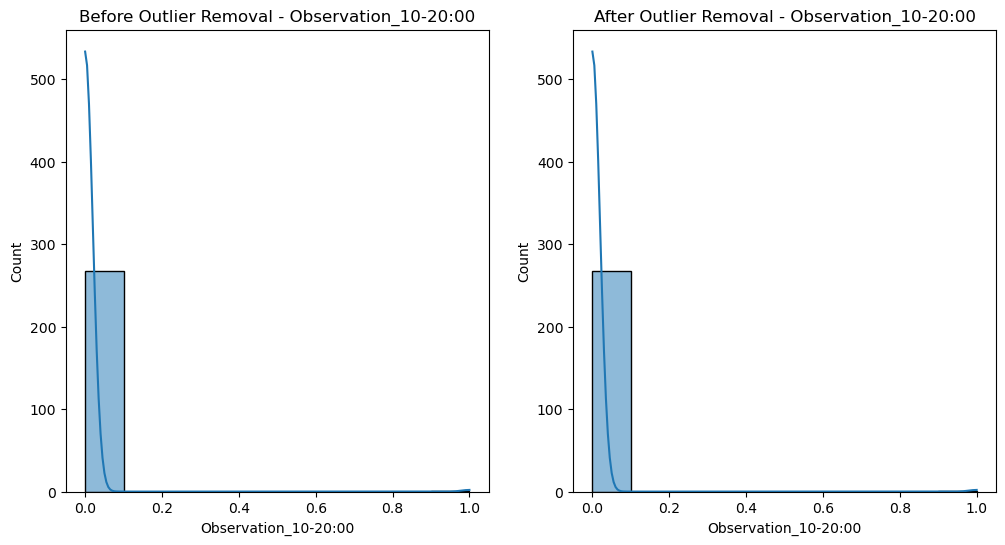

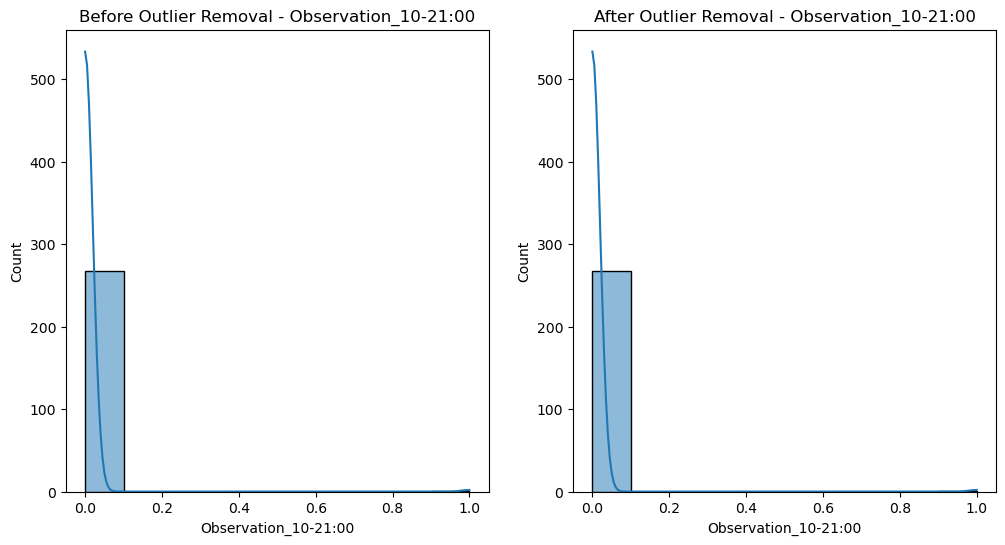

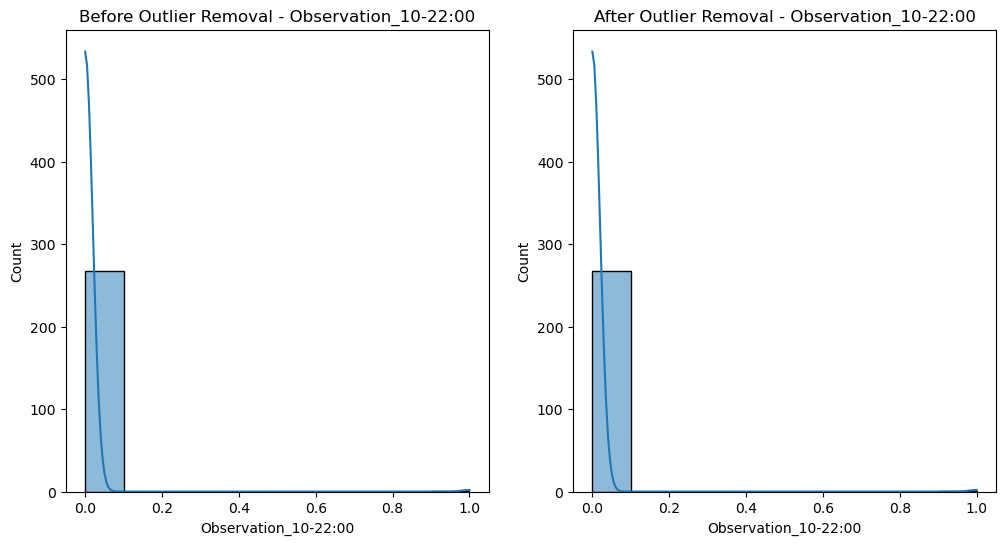

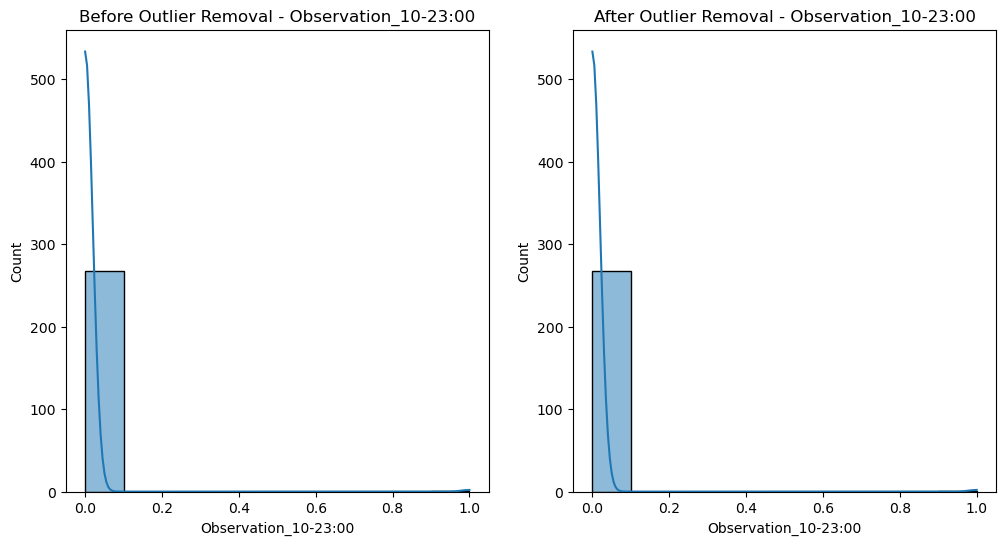

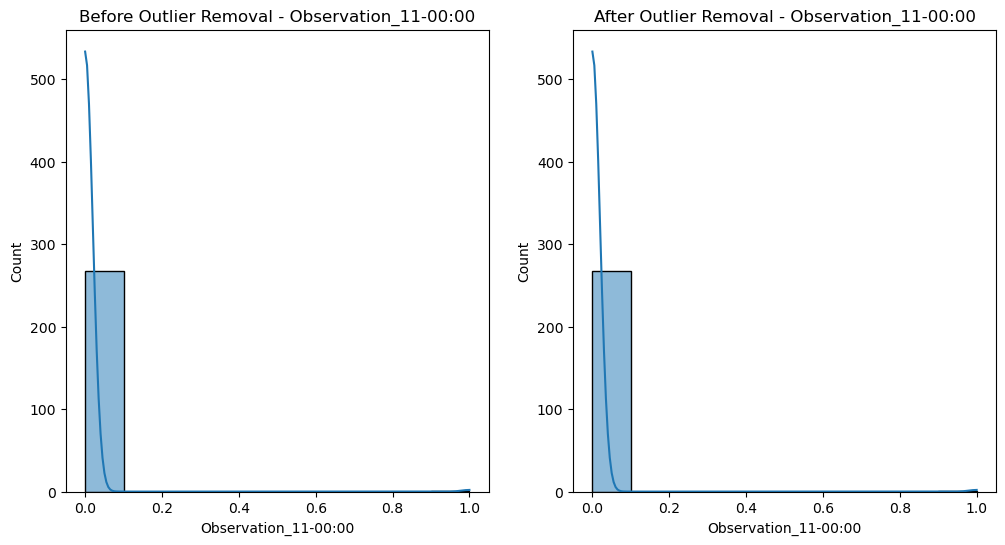

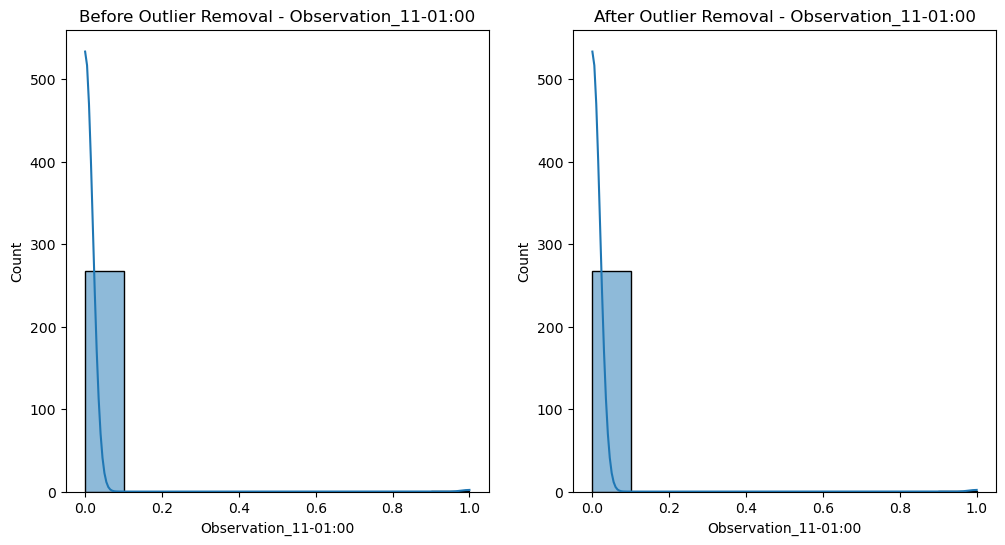

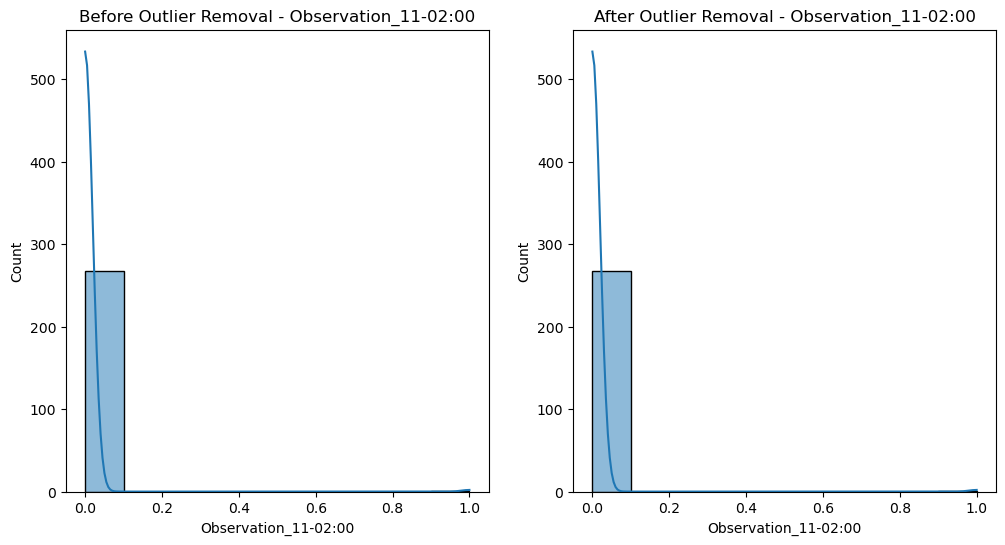

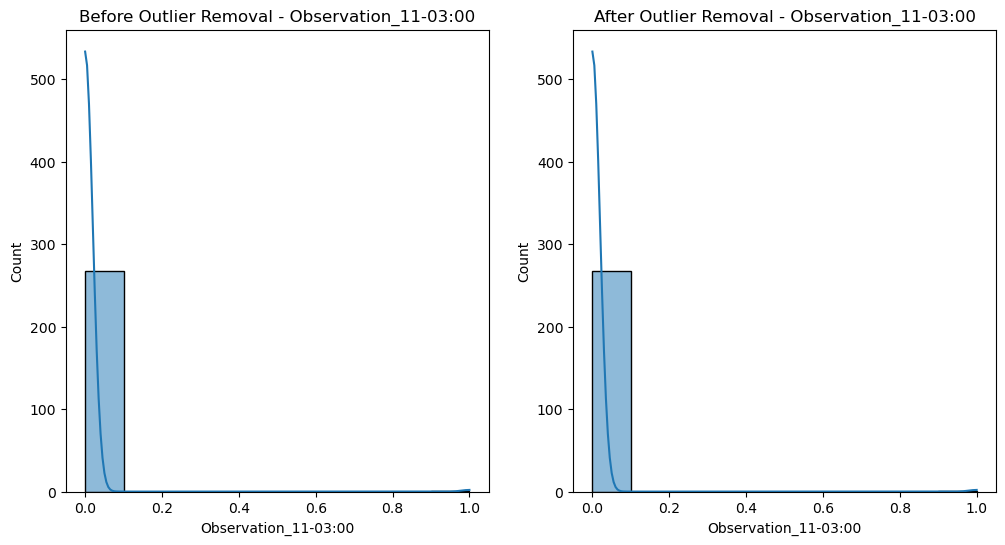

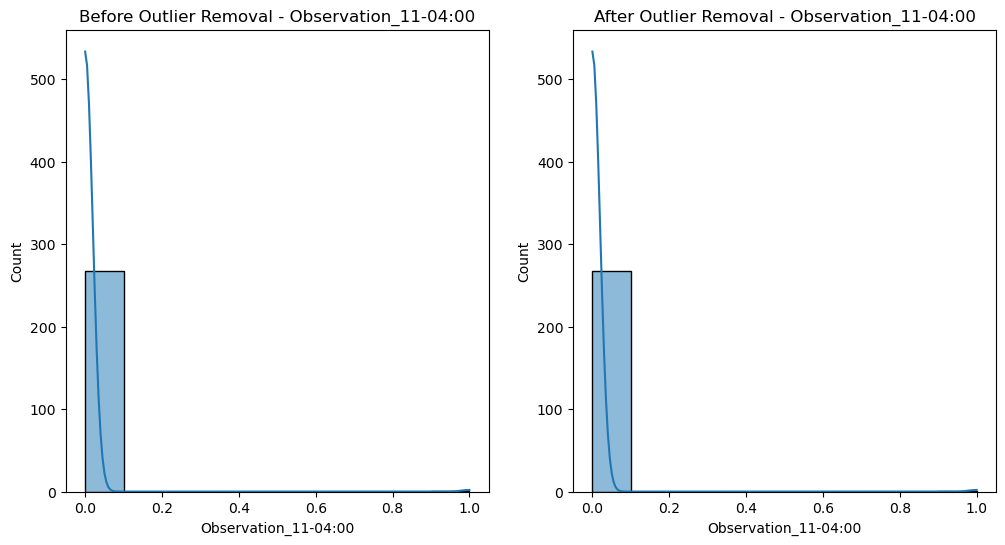

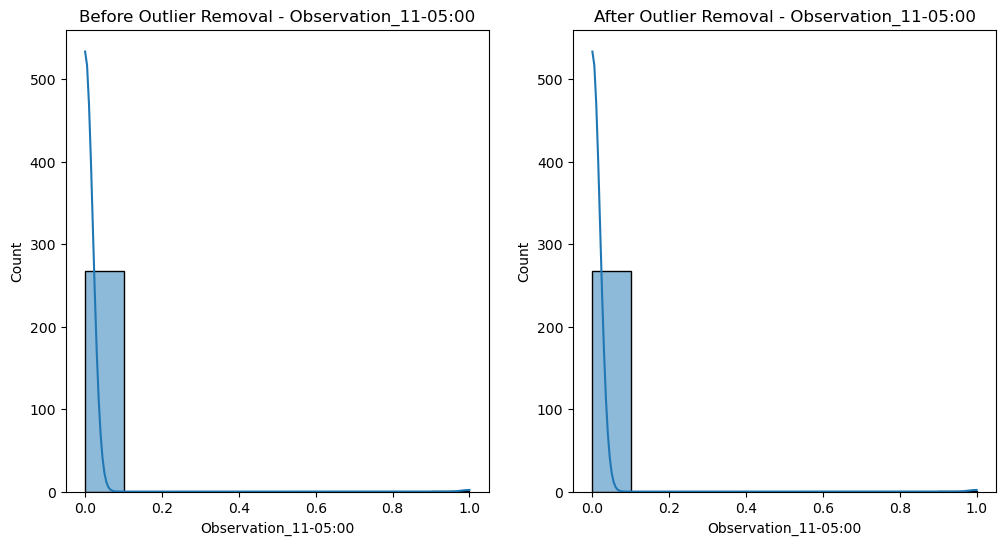

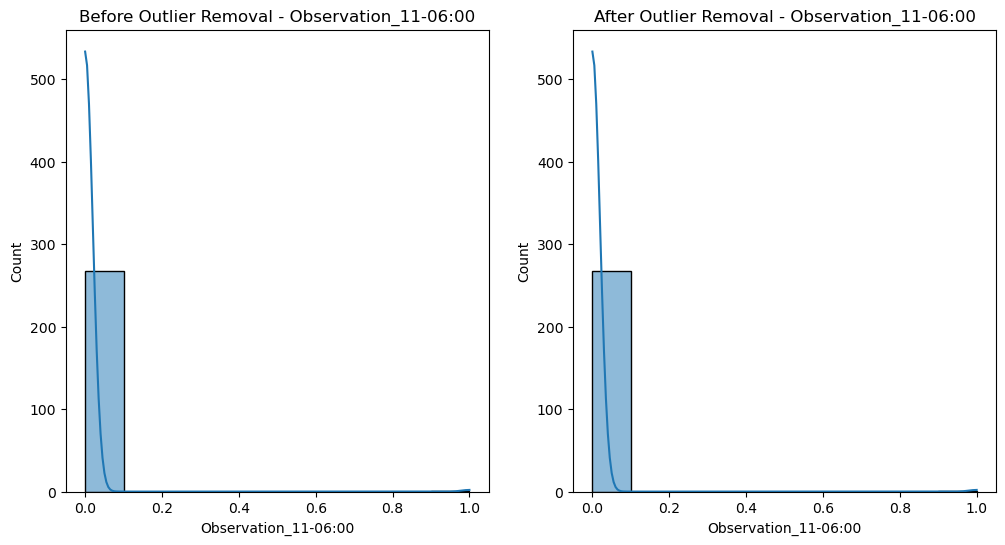

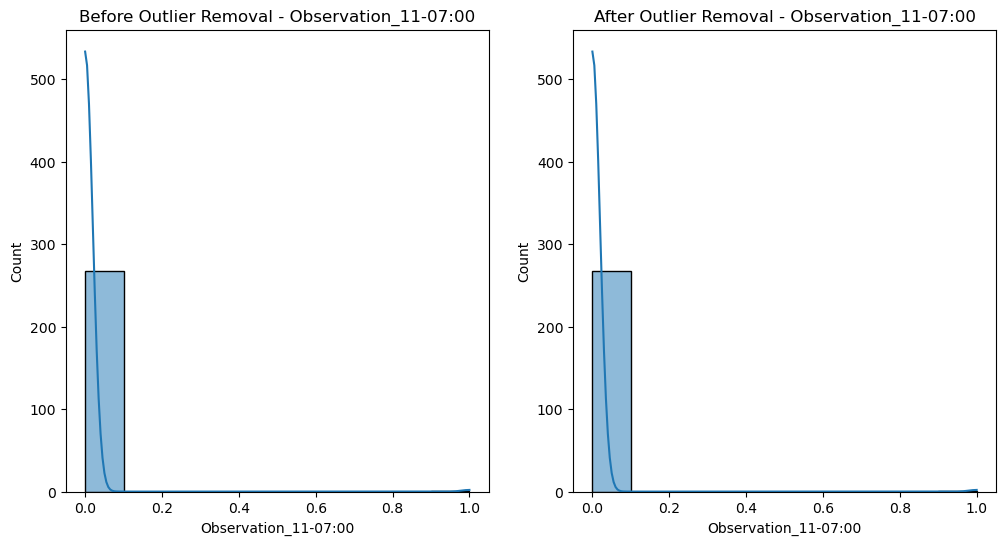

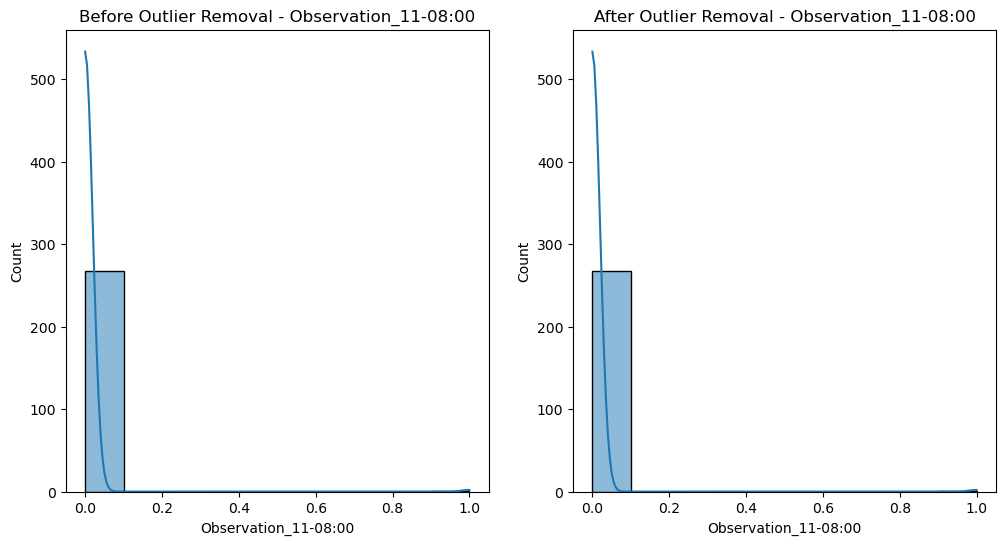

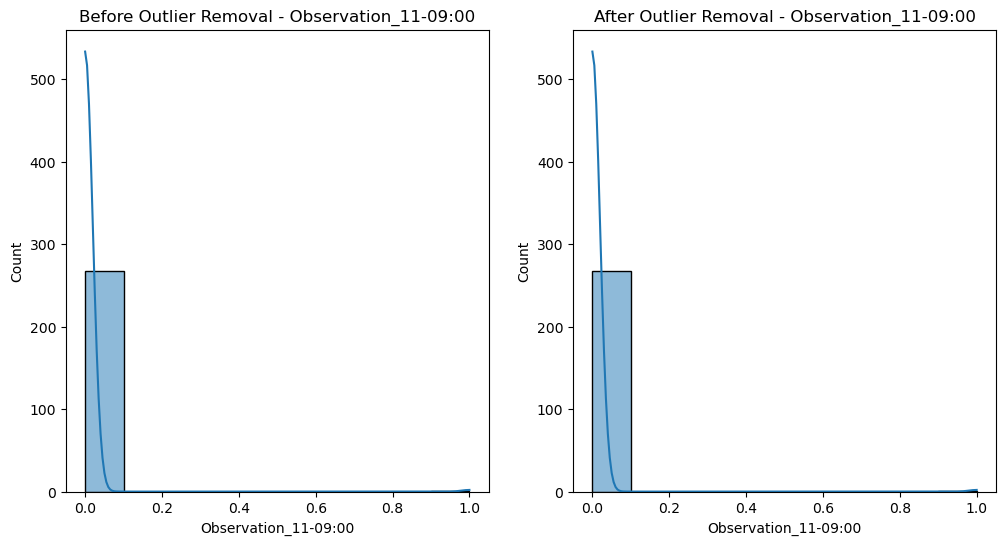

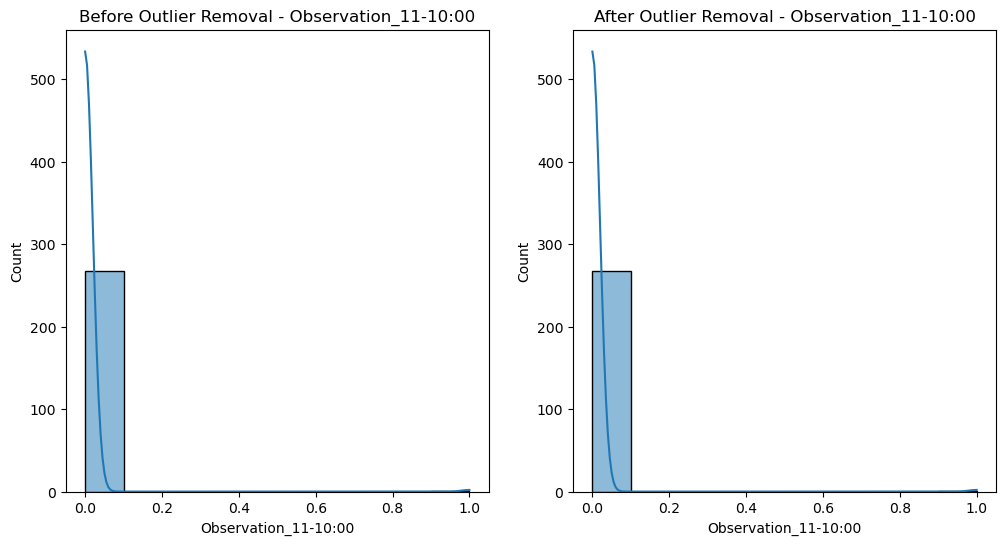

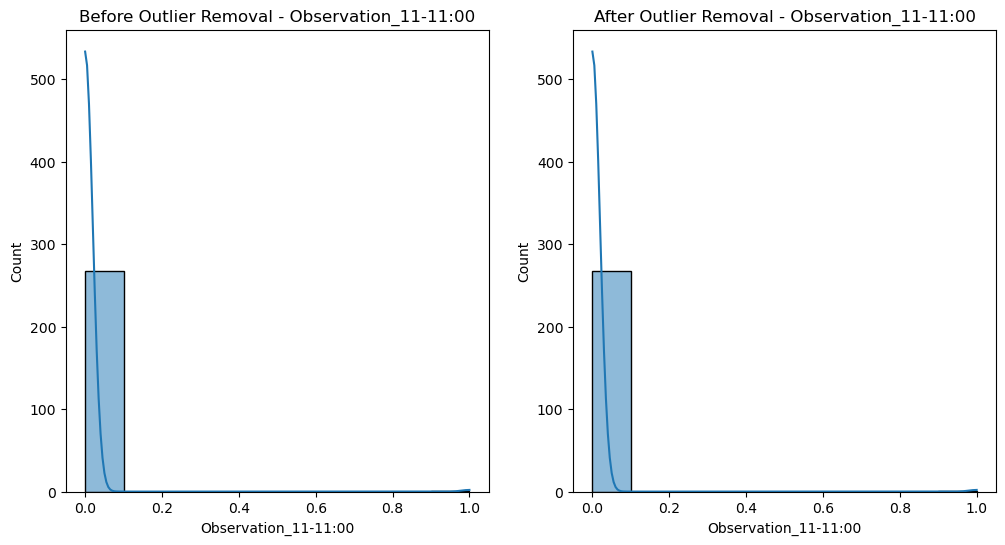

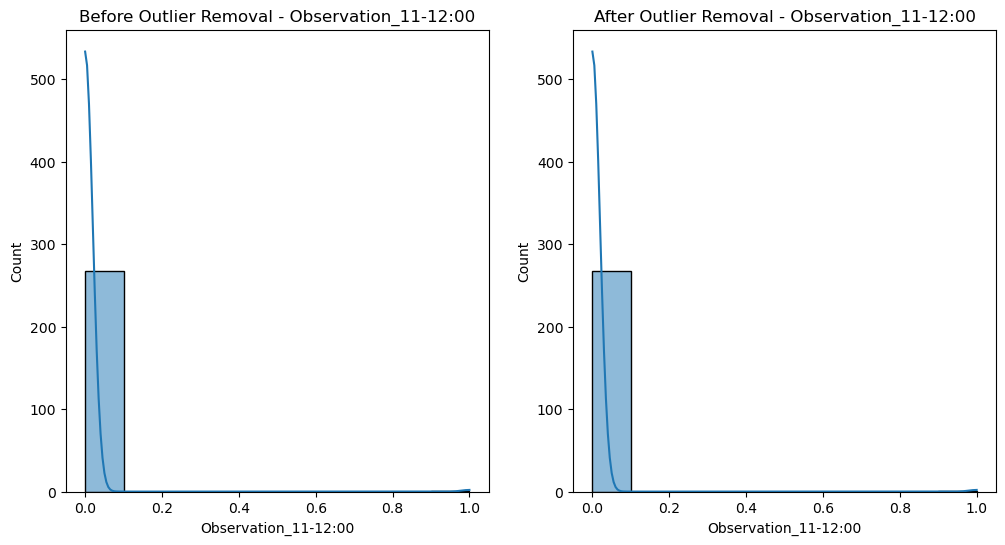

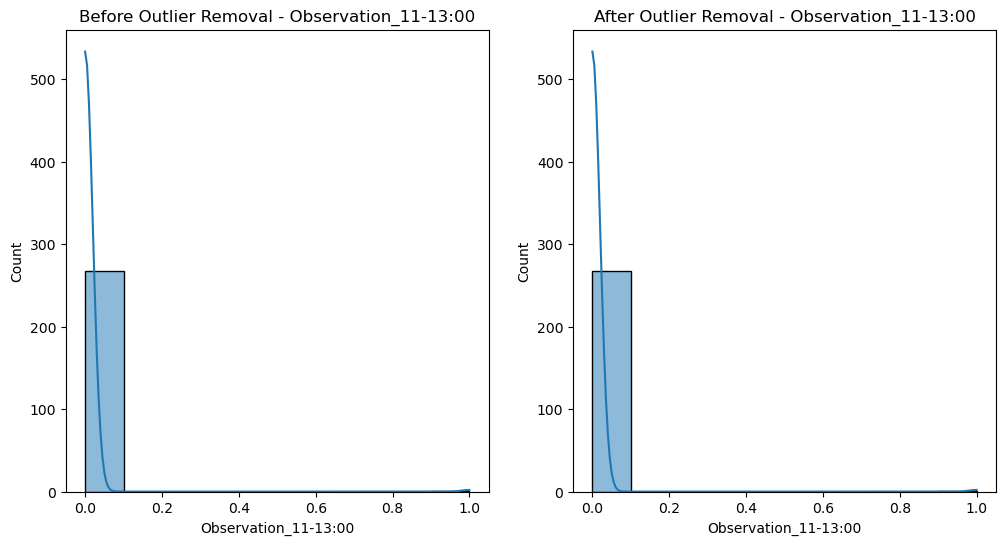

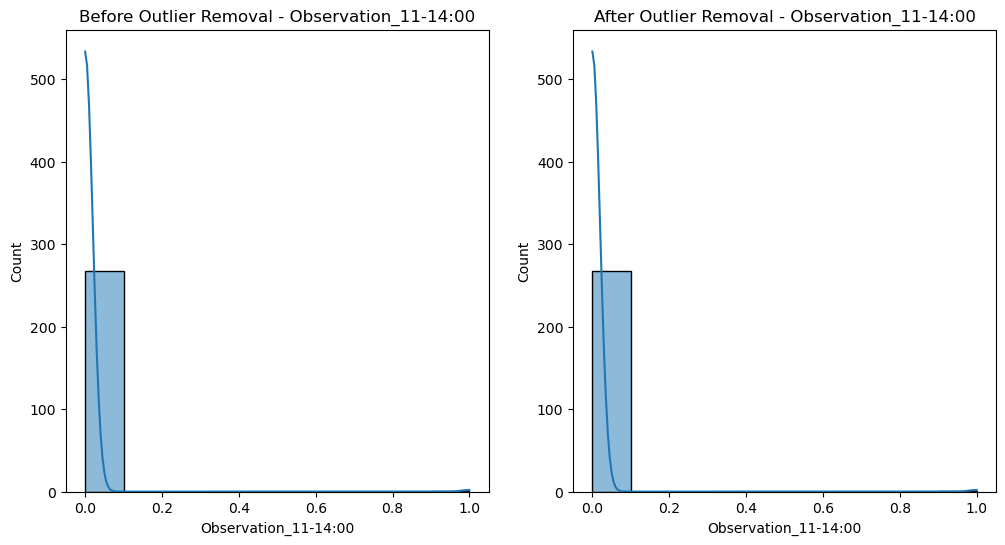

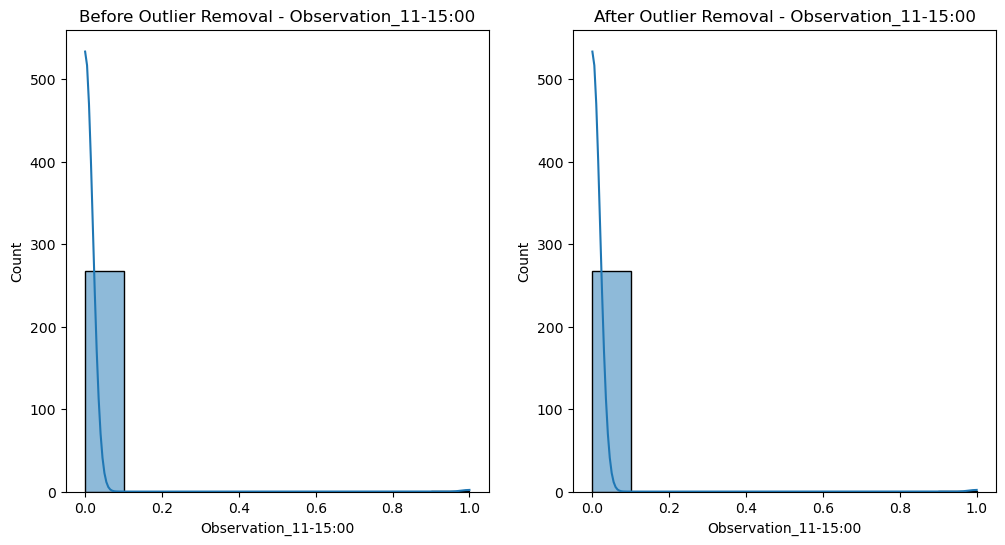

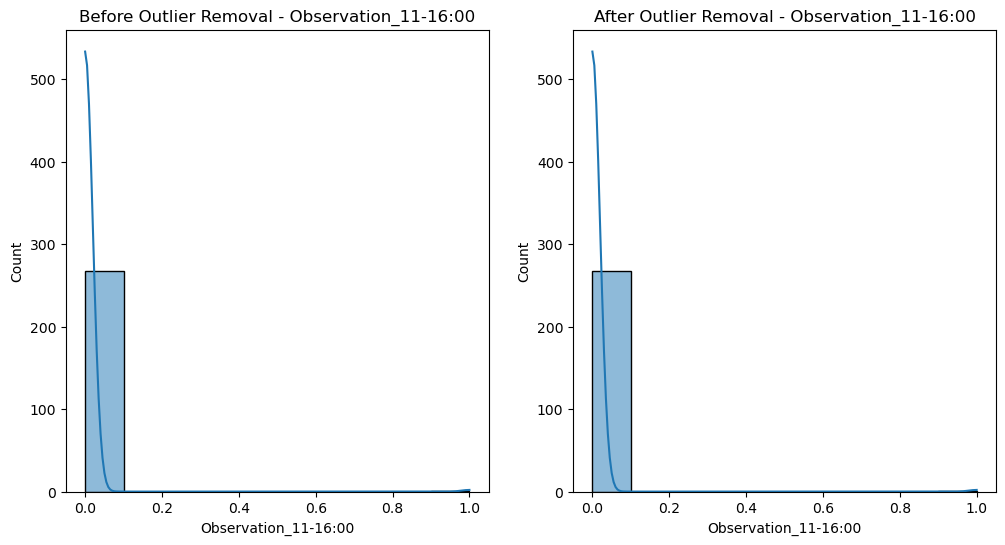

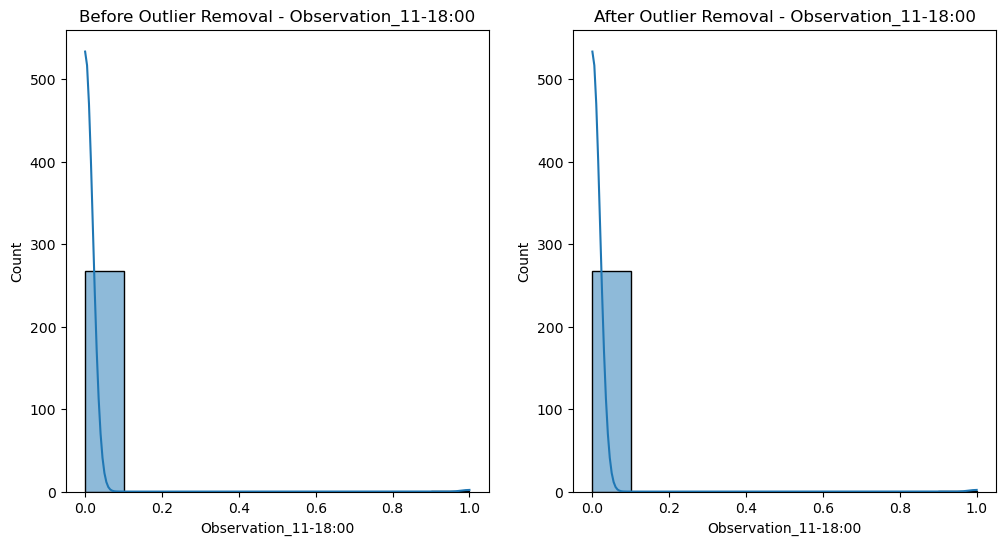

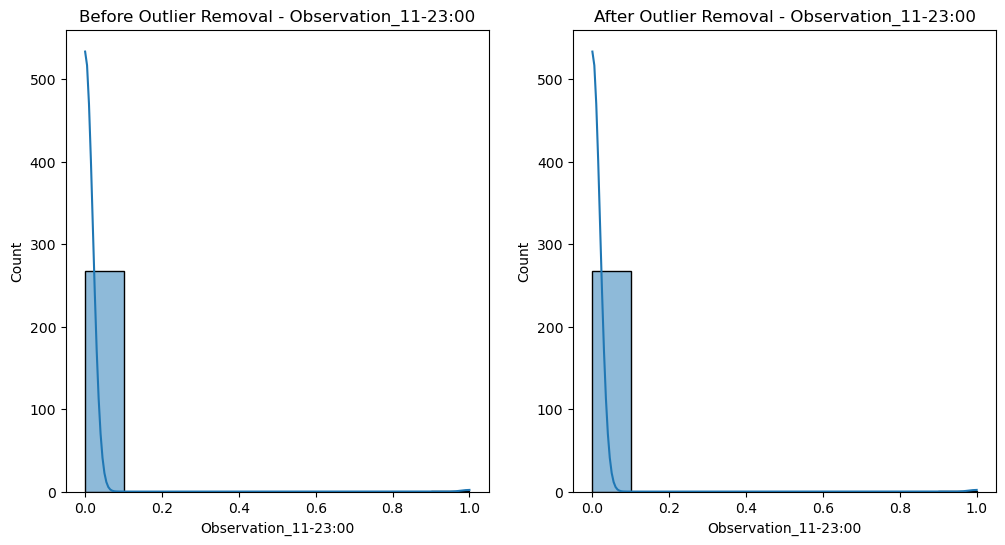

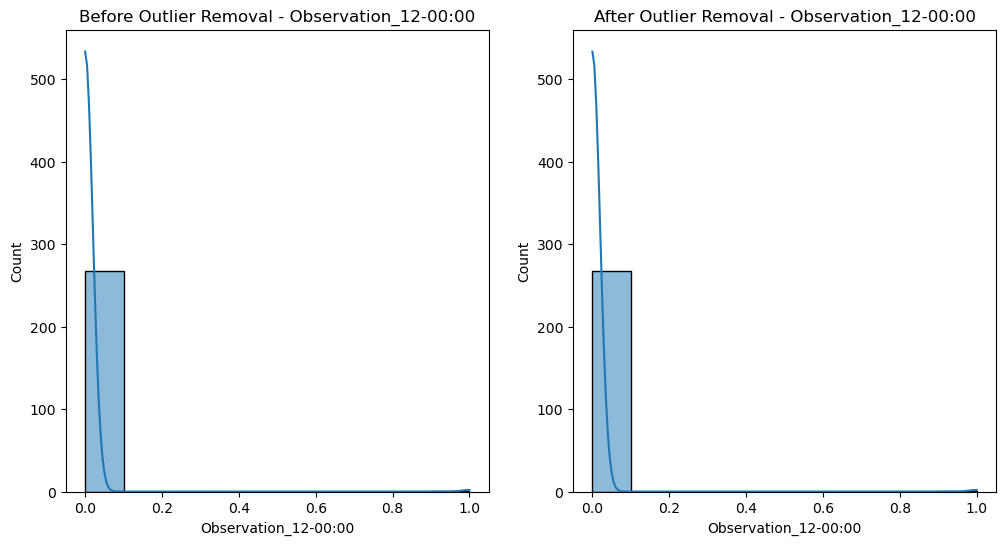

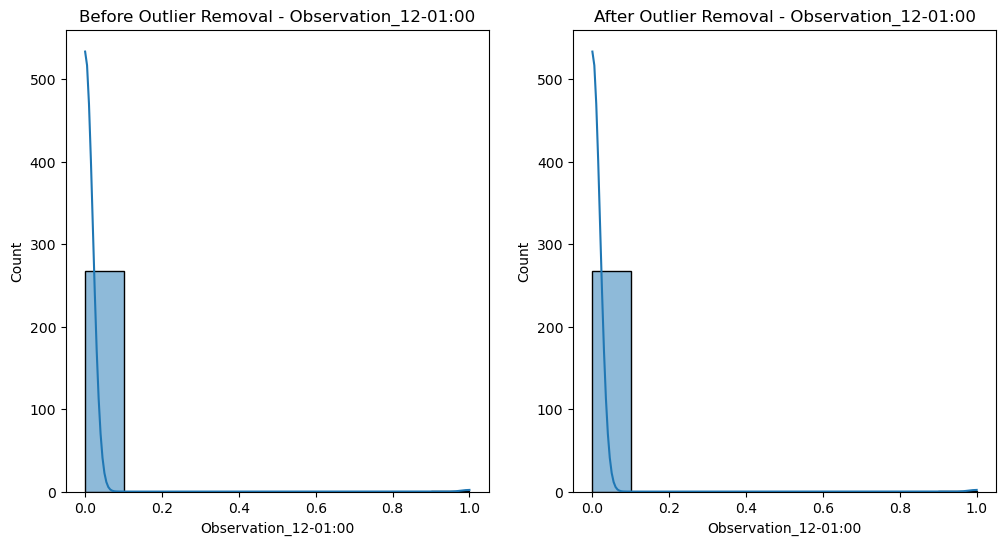

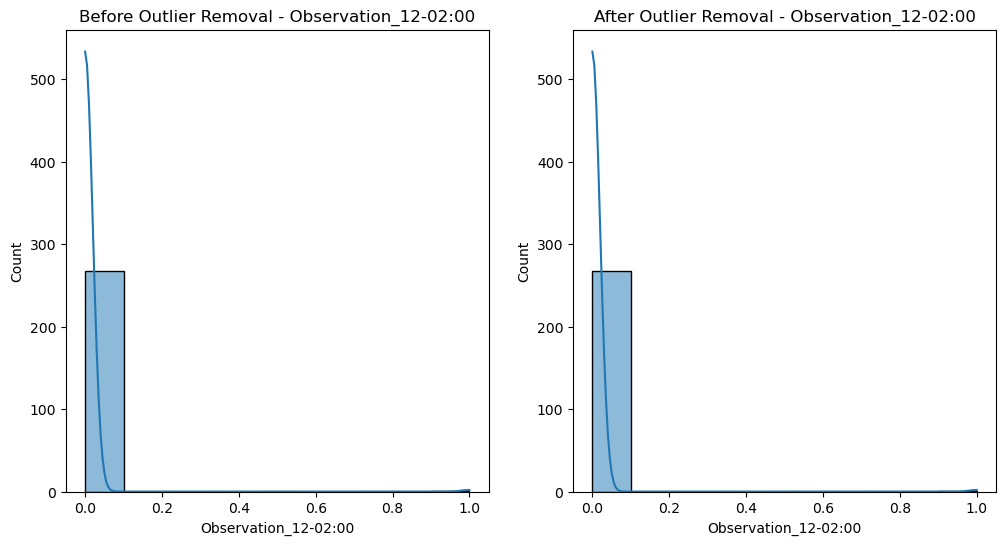

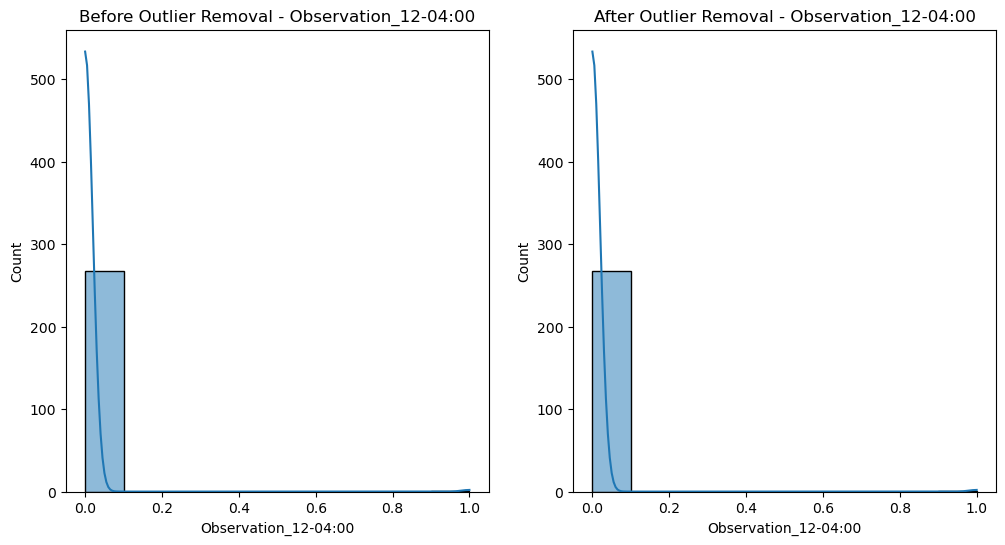

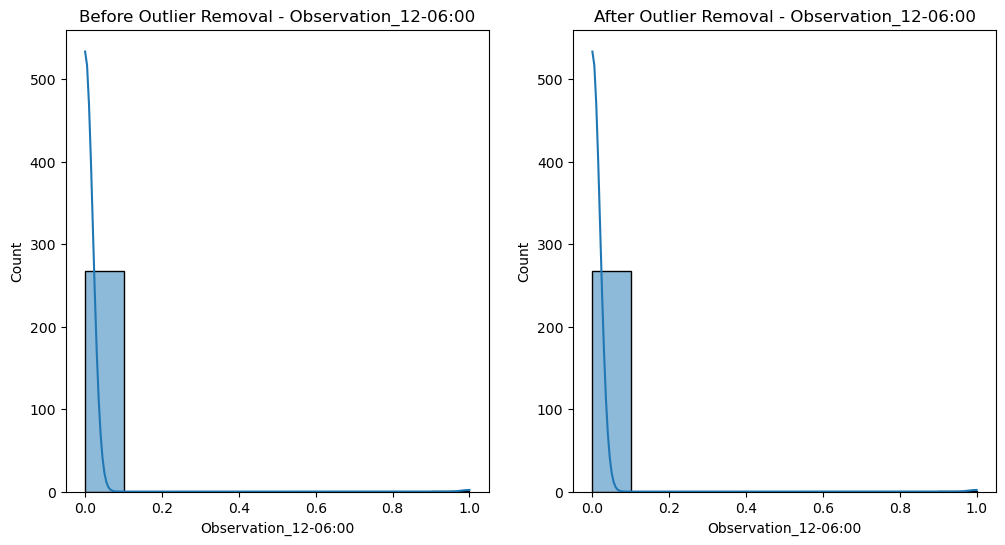

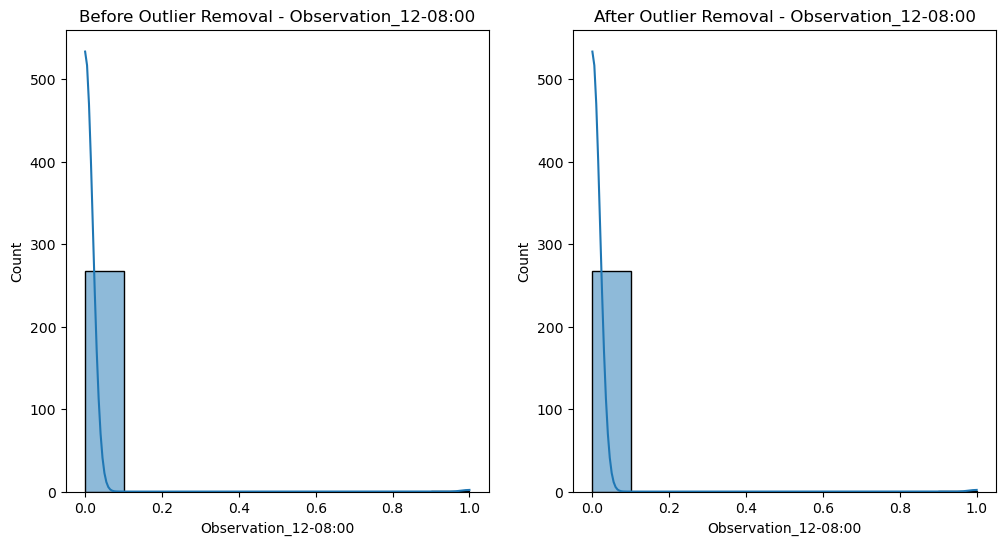

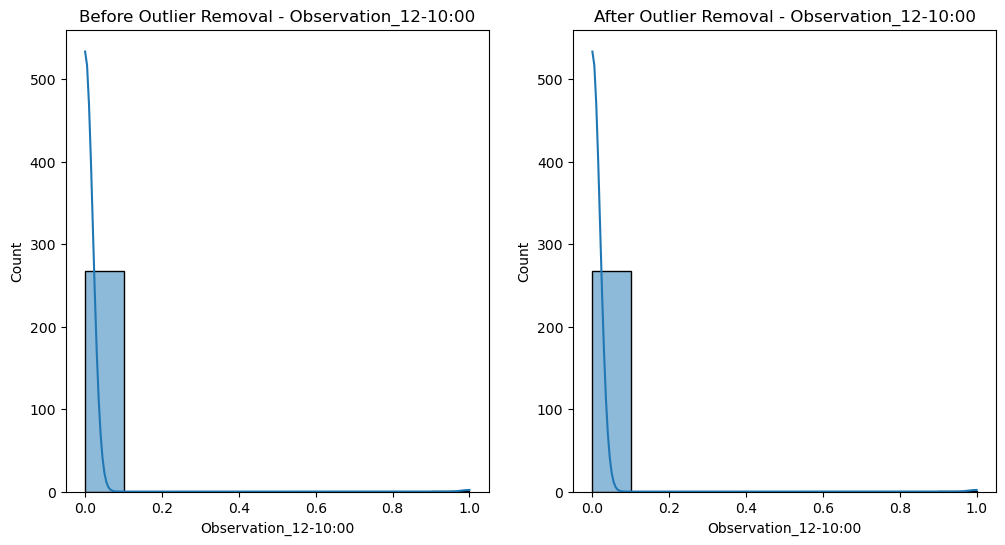

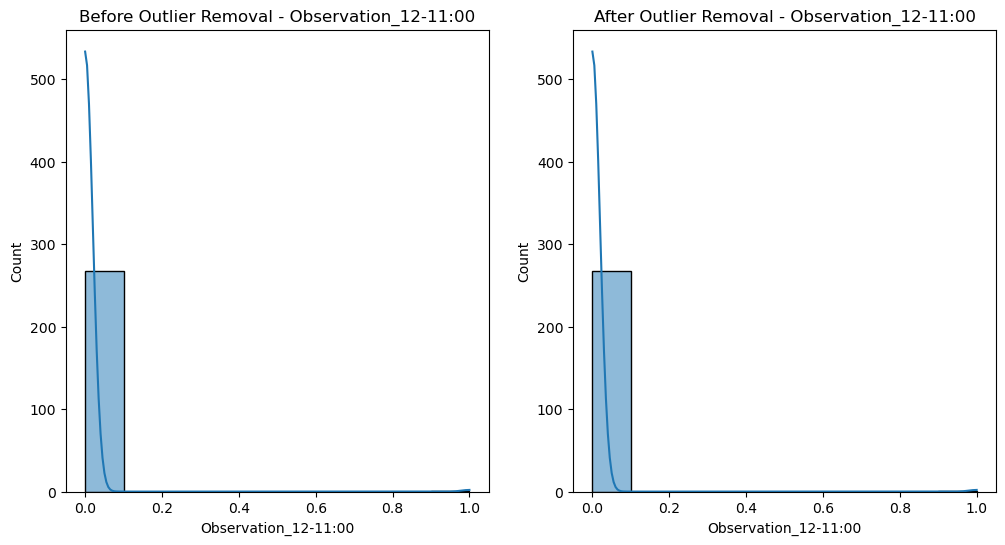

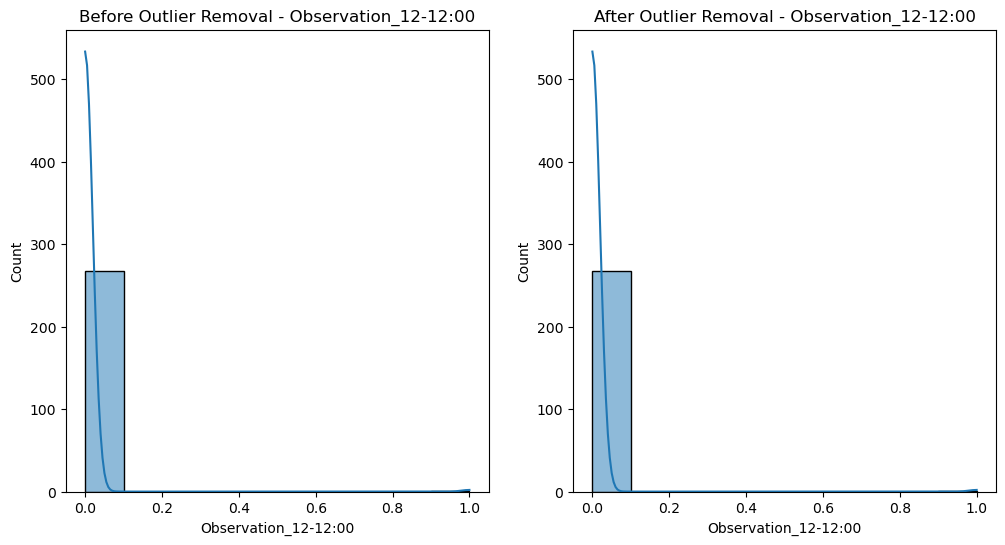

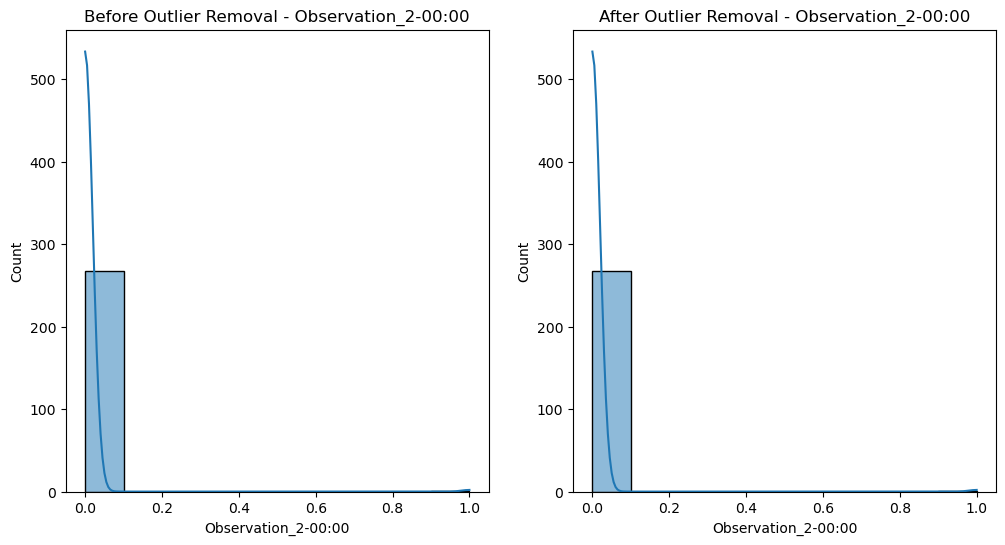

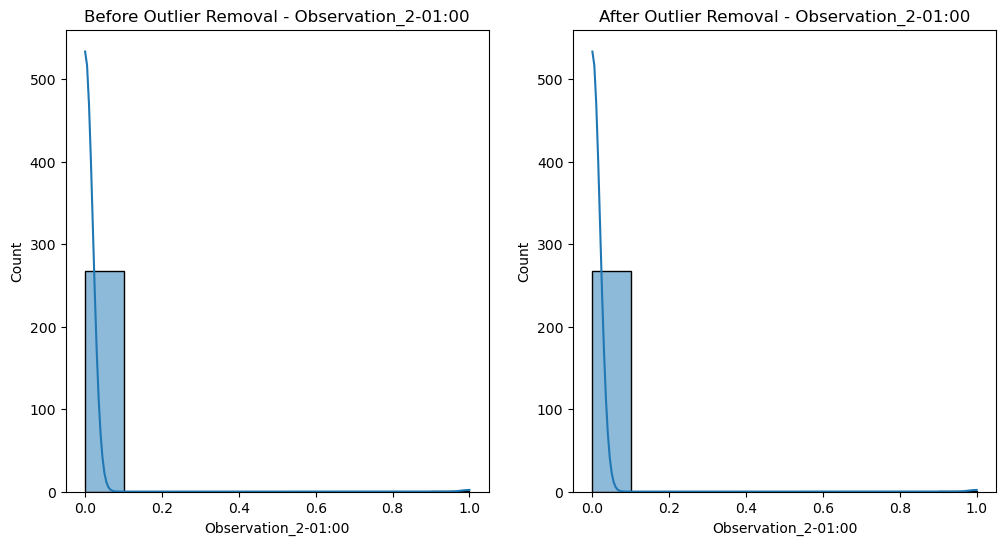

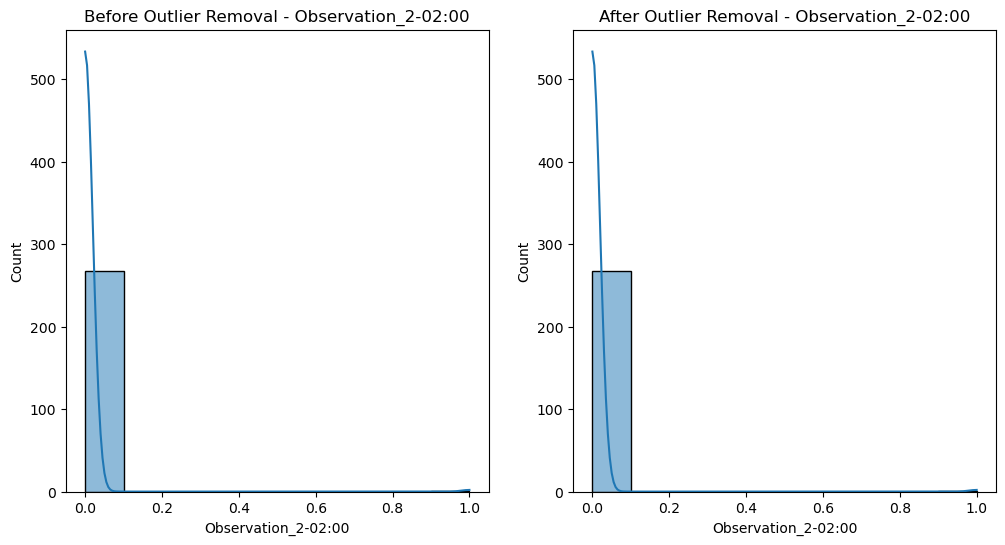

In [ ]:
#Data visualisation
for i in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[i], kde=True)
    plt.title(f'Before Outlier Removal - {i}')

    plt.subplot(1, 2, 2)
    sns.histplot(df[i], kde=True)
    plt.title(f'After Outlier Removal - {i}')

    plt.show()

# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)
